# **BEŞİKTAŞ : 3 - TRABZONSPOR : 2**
# **ZTK FİNAL MAÇI OYUNCU ANALİZLERİ**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/besiktas-trabzonspor-ztc-final-players-statics/bjkts.csv


# Veri Düzenleme ve Import Etme

In [2]:
df = pd.read_csv("/kaggle/input/besiktas-trabzonspor-ztc-final-players-statics/bjkts.csv")

In [3]:
df = df.fillna(0)

# Float tipindeki sütunları int tipine çevirme
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].astype(int)

In [4]:
df.head(10)

Name  Goals  Assists  Tackles  Accurate Passes  \
0        Arthur Masuaku      0        0        0               38   
1         Batista Mendy      0        0        1               32   
2  Berat Ayberk Özdemir      0        0        4               16   
3            Edin Višća      0        0        0               21   
4           Enis Bardhi      0        0        2               25   
5           Eren Elmalı      0        1        4               18   
6           Ernest Muçi      0        0        1               26   
7      Gedson Fernandes      0        0        1               25   
8        Jackson Muleka      0        1        0               18   
9           Joe Worrall      0        0        0                0   

   Total Passes  Accurate Passes (/100)  Total Duels Try  Total Duels Won  \
0            46                      83                6                6   
1            33                      97                5                3   
2            23                      70               10                7   
3            25                      84                6                1   
4            29                      86               11                5   
5            28                      64               11                7   
6            30                      87                9                2   
7            30                      83               13                7   
8            23                      78                6                2   
9             0                       0                0                0   

   Ground Duels Try  ...  Fouls  Was Fouled  Offsides  Saves Goals Prevented  \
0                 4  ...      0           0         0      0               0   
1                 5  ...      0           1         0      0               0   
2                 8  ...      2           1         0      0               0   
3                 3  ...      1           0         0      0               0   
4                 9  ...      4           1         1      0               0   
5                10  ...      2           1         0      0               0   
6                 6  ...      0           1         0      0               0   
7                10  ...      2           3         0      0               0   
8                 3  ...      3           0         0      0               0   
9                 0  ...      0           0         0      0               0   

  Punches  Runs Out Total  Runs Out Succ  High Claims  GoalKeeper Notes  
0       0               0              0            0                 0  
1       0               0              0            0                 0  
2       0               0              0            0                 0  
3       0               0              0            0                 0  
4       0               0              0            0                 0  
5       0               0              0            0                 0  
6       0               0              0            0                 0  
7       0               0              0            0                 0  
8       0               0              0            0                 0  
9       0               0              0            0                 0  

[10 rows x 47 columns]

Futbolcuları Maç reytingine göre sıralayalım.

In [5]:
df_sorted = df.sort_values(by='Rating', ascending=False)
df_sorted.head(10)

Name  Goals  Assists  Tackles  Accurate Passes  \
14  Mutassim Al Musrati      1        0        0               53   
27        Uğurcan Çakır      0        0        0               25   
16         Nicolas Pépé      1        0        2               11   
19       Rachid Ghezzal      1        0        0               29   
12           Mert Günok      0        0        0               11   
3            Edin Višća      0        0        0               21   
20           Salih Uçan      1        0        2               38   
18         Paul Onuachu      1        0        2               11   
8        Jackson Muleka      0        1        0               18   
0        Arthur Masuaku      0        0        0               38   

    Total Passes  Accurate Passes (/100)  Total Duels Try  Total Duels Won  \
14            56                      95                9                3   
27            43                      58                1                0   
16            14                      79                4                3   
19            33                      88               12                3   
12            19                      58                1                1   
3             25                      84                6                1   
20            43                      88               11                5   
18            22                      50               26               14   
8             23                      78                6                2   
0             46                      83                6                6   

    Ground Duels Try  ...  Fouls  Was Fouled  Offsides  Saves Goals Prevented  \
14                 5  ...      1           2         0      0               0   
27                 0  ...      0           0         0      7               0   
16                 2  ...      0           0         0      0               0   
19                12  ...      2           2         0      0               0   
12                 0  ...      0           0         0      5               0   
3                  3  ...      1           0         0      0               0   
20                 9  ...      2           0         0      0               0   
18                 8  ...      1           1         1      0               0   
8                  3  ...      3           0         0      0               0   
0                  4  ...      0           0         0      0               0   

   Punches  Runs Out Total  Runs Out Succ  High Claims  \
14       0               0              0            0   
27       0               0              0            3   
16       0               0              0            0   
19       0               0              0            0   
12       0               0              0            1   
3        0               0              0            0   
20       0               0              0            0   
18       0               0              0            0   
8        0               0              0            0   
0        0               0              0            0   

            GoalKeeper Notes  
14                         0  
27  Saves from inside box: 4  
16                         0  
19                         0  
12  Saves from inside box: 4  
3                          0  
20                         0  
18                         0  
8                          0  
0                          0  

[10 rows x 47 columns]

En iyi maç reytingine sahip 10 oyuncuyu görüntüledik. Şimdi gol atan veya asist yapan yani skora katkıda bulunan oyuncuları listeleyelim.

In [6]:
df_scorer = df[(df['Goals'] > 0) | (df['Assists'] > 0)]
df_scorer.sort_values(by='Rating', ascending=False)

Name  Goals  Assists  Tackles  Accurate Passes  \
14  Mutassim Al Musrati      1        0        0               53   
16         Nicolas Pépé      1        0        2               11   
19       Rachid Ghezzal      1        0        0               29   
8        Jackson Muleka      0        1        0               18   
18         Paul Onuachu      1        0        2               11   
20           Salih Uçan      1        0        2               38   
5           Eren Elmalı      0        1        4               18   

    Total Passes  Accurate Passes (/100)  Total Duels Try  Total Duels Won  \
14            56                      95                9                3   
16            14                      79                4                3   
19            33                      88               12                3   
8             23                      78                6                2   
18            22                      50               26               14   
20            43                      88               11                5   
5             28                      64               11                7   

    Ground Duels Try  ...  Fouls  Was Fouled  Offsides  Saves Goals Prevented  \
14                 5  ...      1           2         0      0               0   
16                 2  ...      0           0         0      0               0   
19                12  ...      2           2         0      0               0   
8                  3  ...      3           0         0      0               0   
18                 8  ...      1           1         1      0               0   
20                 9  ...      2           0         0      0               0   
5                 10  ...      2           1         0      0               0   

   Punches  Runs Out Total  Runs Out Succ  High Claims  GoalKeeper Notes  
14       0               0              0            0                 0  
16       0               0              0            0                 0  
19       0               0              0            0                 0  
8        0               0              0            0                 0  
18       0               0              0            0                 0  
20       0               0              0            0                 0  
5        0               0              0            0                 0  

[7 rows x 47 columns]

Maçın en iyi 10 oyuncu listesinde iki kaleci de yer alıyordu. Şimdi kalecileri inceleyelim.

# Kaleci Performansları

Kalecilerin kurtarış ve yüksek topları yakalama değerlerini inceleyelim.

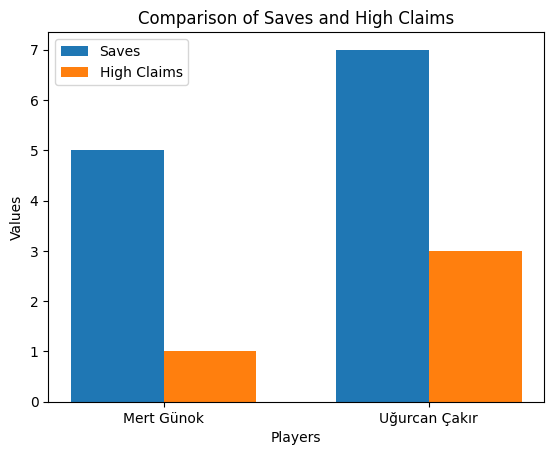

In [9]:
players = df[df['Name'].isin(['Mert Günok', 'Uğurcan Çakır'])]

# Bar plot için verileri hazırlama
names = players['Name']
saves = players['Saves']
high_claims = players['High Claims']

# Bar plot oluşturma
bar_width = 0.35
index = range(len(names))

fig, ax = plt.subplots()
bar1 = plt.bar(index, saves, bar_width, label='Saves')
bar2 = plt.bar([i + bar_width for i in index], high_claims, bar_width, label='High Claims')

plt.xlabel('Players')
plt.ylabel('Values')
plt.title('Comparison of Saves and High Claims')
plt.xticks([i + bar_width / 2 for i in index], names)
plt.legend()

plt.show()

Kurtarış olarak da yüksek topları toplama değerlerinde de Uğurcan Çakır, Mert Günok'a göre önde. Bir de pas değerlerini inceleyelim.

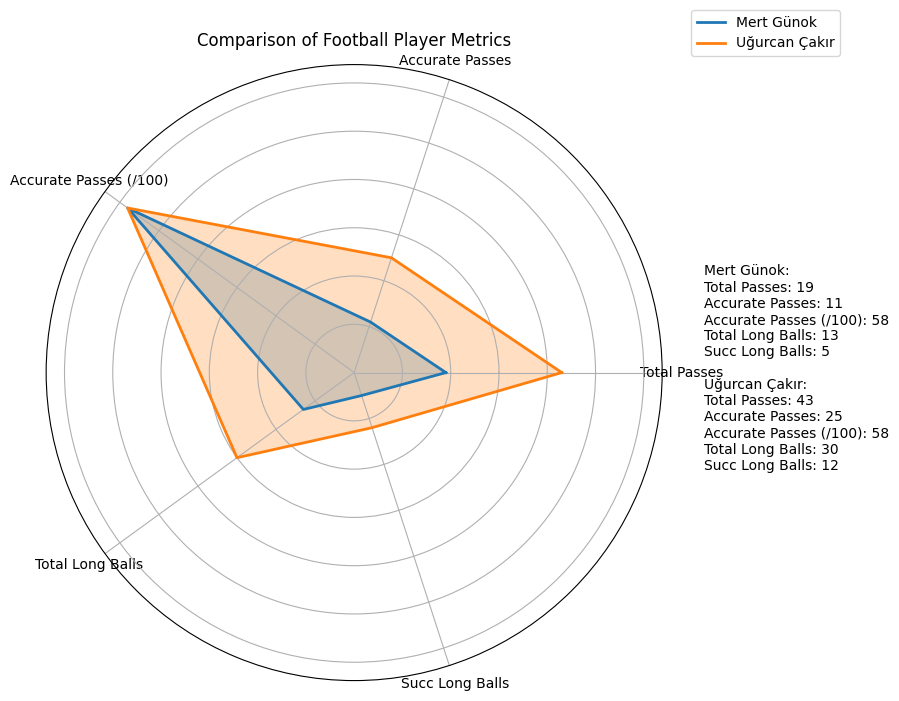

In [14]:

# İlgili satırları seçme
players = df[df['Name'].isin(['Mert Günok', 'Uğurcan Çakır'])]

# Radar grafiği için verileri hazırlama
categories = ['Total Passes', 'Accurate Passes', 'Accurate Passes (/100)', 'Total Long Balls', 'Succ Long Balls']
num_vars = len(categories)

# Radar grafiği için açıları hesaplama
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Tam bir daire oluşturmak için

# Radar grafiği verilerini kapatmak için
def create_radar_data(row):
    values = row[categories].tolist()
    values += values[:1]
    return values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Mert Günok'un verileri
values = create_radar_data(players.iloc[0])
ax.plot(angles, values, label='Mert Günok', linewidth=2, linestyle='solid')
ax.fill(angles, values, alpha=0.25)

# Uğurcan Çakır'ın verileri
values = create_radar_data(players.iloc[1])
ax.plot(angles, values, label='Uğurcan Çakır', linewidth=2, linestyle='solid')
ax.fill(angles, values, alpha=0.25)

# Grafik ayarları
ax.set_ylim(0, max(players[categories].max())*1.1)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Legend için verileri hazırlama
legend_data = []
for i, row in players.iterrows():
    legend_data.append(f"{row['Name']}:\n" + "\n".join([f"{cat}: {row[cat]}" for cat in categories]))

# Legend'ı ekleme
plt.gcf().text(0.95, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

plt.title('Comparison of Football Player Metrics')
plt.show()


Başarılı pas yüzdesi hariç tüm değerler de Uğurcan Çakır önde gözüküyor. Ancak Mert Günok'un daha az uzun top atma sebebi takımların oyun taktikleri sebebiyle olabilir. Beşiktaş daha fazla oyunu önde oynadığı için, bu sebeple rakibini geriye yasladığı için, Uğurcan Çakır daha fazla uzun top atmak zorunda kalmış olabilir. Ama Trabzonspor forveti Onuachu'nun uzun boylu bir pivot santrafor olması sebebiyle Uğurcan Çakır kendisine gelen topların büyük bir kısmını uzun top olarak oynamış olabilir. 

# Trabzonspor'un en önemli gol kozu Onuachu ve ondan sorumlu Beşiktaş stoperleri

Bu sebeple şimdi Onuachu ve ondan sorumlu olan Beşiktaş stoperlerini inceleyelim

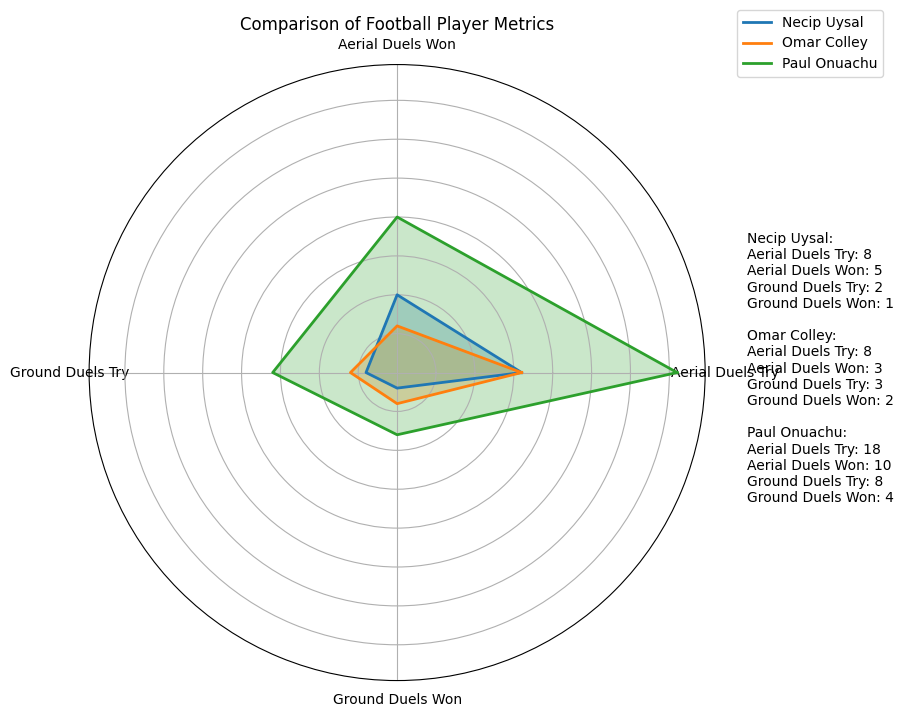

In [19]:

# İlgili satırları seçme
players = df[df['Name'].isin(['Paul Onuachu', 'Necip Uysal', 'Omar Colley'])]

if players.empty:
    print("İlgili oyuncular bulunamadı.")
else:
    # Radar grafiği için verileri hazırlama
    categories = ['Aerial Duels Try', 'Aerial Duels Won', 'Ground Duels Try', 'Ground Duels Won']
    num_vars = len(categories)

    # Radar grafiği için açıları hesaplama
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Tam bir daire oluşturmak için

    # Radar grafiği verilerini kapatmak için
    def create_radar_data(row):
        values = row[categories].tolist()
        values += values[:1]
        return values

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Her oyuncunun verilerini ekleme
    for idx, player in players.iterrows():
        values = create_radar_data(player)
        ax.plot(angles, values, label=player['Name'], linewidth=2, linestyle='solid')
        ax.fill(angles, values, alpha=0.25)

    # Grafik ayarları
    ax.set_ylim(0, max(players[categories].max())*1.1)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    # Legend için verileri hazırlama
    legend_data = []
    for i, row in players.iterrows():
        legend_data.append(f"{row['Name']}:\n" + "\n".join([f"{cat}: {row[cat]}" for cat in categories]))

    # Legend'ı ekleme
    plt.gcf().text(0.95, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

    plt.title('Comparison of Football Player Metrics')
    plt.show()


Necip ve Colley totalde 16 kez hava topu mücadelesine girmiş. İkisinin toplamda kazandığı hava topu mücadelesi 8. Ancak Onuachu için bu sayı 10. **Necip Uysal**'ın hava topu mücadele başarısı **%62.5** ; **Colley**'in ise **%37.5** 

**Onuachu**'nun hava topu mücadelesinin başarı yüzdesi ise yaklaşık olarak **%55 **

Onuachu'nun bu ikiliye karşı ciddi bir hava topu üstünlüğü gözüküyor.

Peki Necip-Colley tandemi Trabzon'un Mendy-Denswil tandemine göre iyi mi kötü mü?



# Takımların Stoper Tandemlerinin karşılaştırılması

Necip-Colley ve Mendy-Denswil tandemlerini önce bireysel, sonra da tandem olarak karşılaştıralım

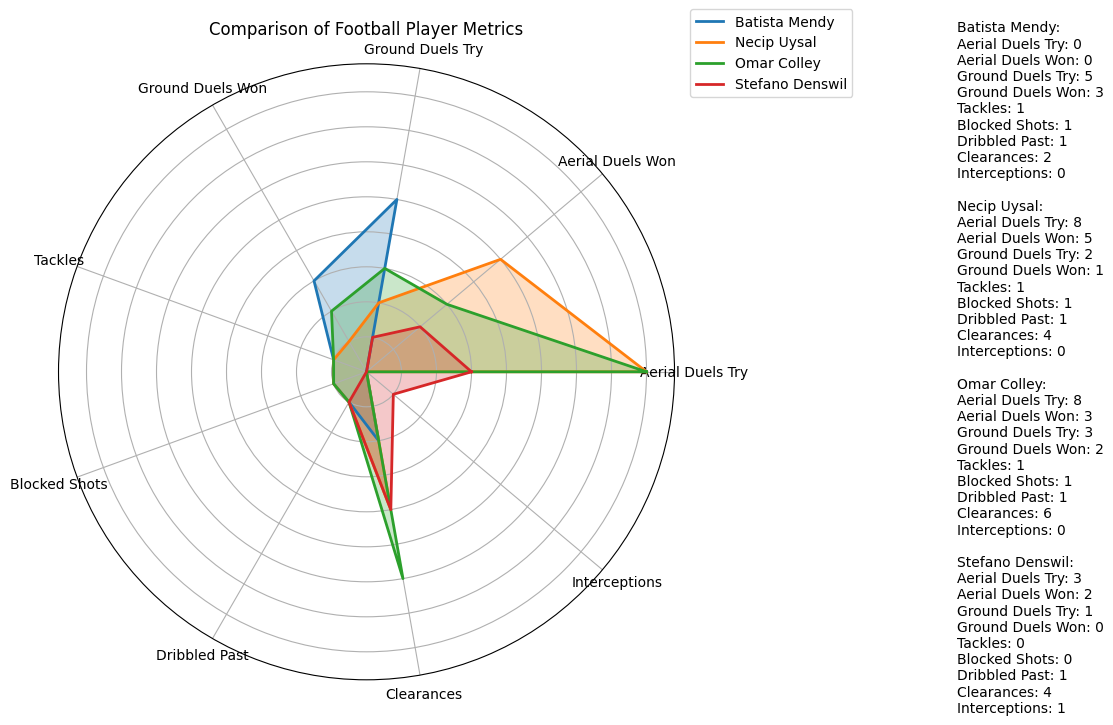

In [23]:
players = df[df['Name'].isin(['Necip Uysal', 'Omar Colley', 'Batista Mendy', 'Stefano Denswil'])]

if players.empty:
    print("İlgili oyuncular bulunamadı.")
else:
    # Radar grafiği için verileri hazırlama
    categories = ['Aerial Duels Try', 'Aerial Duels Won', 'Ground Duels Try', 'Ground Duels Won', 
                  'Tackles', 'Blocked Shots', 'Dribbled Past', 'Clearances', 'Interceptions']
    num_vars = len(categories)

    # Radar grafiği için açıları hesaplama
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Tam bir daire oluşturmak için

    # Radar grafiği verilerini kapatmak için
    def create_radar_data(row):
        values = row[categories].tolist()
        values += values[:1]
        return values

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Her oyuncunun verilerini ekleme
    for idx, player in players.iterrows():
        values = create_radar_data(player)
        ax.plot(angles, values, label=player['Name'], linewidth=2, linestyle='solid')
        ax.fill(angles, values, alpha=0.25)

    # Grafik ayarları
    ax.set_ylim(0, max(players[categories].max())*1.1)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    # Legend için verileri hazırlama
    legend_data = []
    for i, row in players.iterrows():
        legend_data.append(f"{row['Name']}:\n" + "\n".join([f"{cat}: {row[cat]}" for cat in categories]))

    # Legend'ı ekleme
    plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

    plt.title('Comparison of Football Player Metrics')
    plt.show()


İlginç bir şekilde Mendy stoper oynamasına rağmen hiçbir hava topu mücadelesine girmemiş. Bu şekilde karmaşık olduğu için tandem şeklinde total değerler olarak inceleyelim

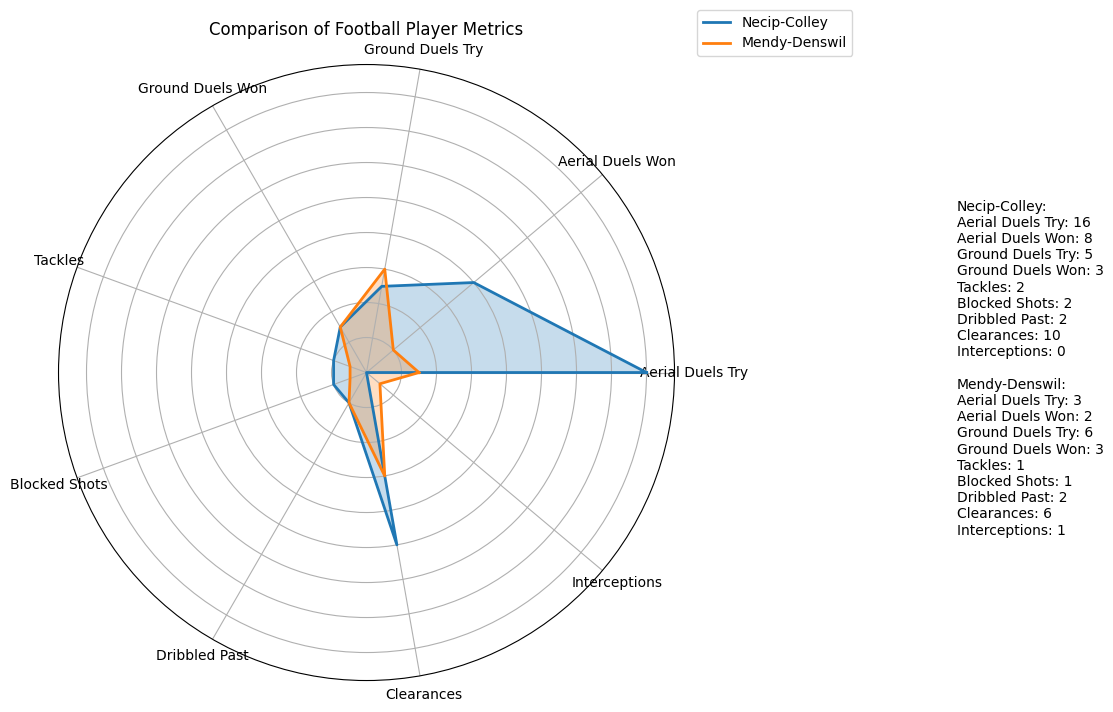

In [24]:
# Gruplar oluşturma
group1 = df[df['Name'].isin(['Necip Uysal', 'Omar Colley'])].sum(numeric_only=True)
group2 = df[df['Name'].isin(['Batista Mendy', 'Stefano Denswil'])].sum(numeric_only=True)

# Radar grafiği için verileri hazırlama
categories = ['Aerial Duels Try', 'Aerial Duels Won', 'Ground Duels Try', 'Ground Duels Won', 
              'Tackles', 'Blocked Shots', 'Dribbled Past', 'Clearances', 'Interceptions']
num_vars = len(categories)

# Radar grafiği için açıları hesaplama
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Tam bir daire oluşturmak için

# Radar grafiği verilerini kapatmak için
def create_radar_data(row):
    values = row[categories].tolist()
    values += values[:1]
    return values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Grupların verilerini ekleme
values1 = create_radar_data(group1)
ax.plot(angles, values1, label='Necip-Colley', linewidth=2, linestyle='solid')
ax.fill(angles, values1, alpha=0.25)

values2 = create_radar_data(group2)
ax.plot(angles, values2, label='Mendy-Denswil', linewidth=2, linestyle='solid')
ax.fill(angles, values2, alpha=0.25)

# Grafik ayarları
ax.set_ylim(0, max(max(values1), max(values2)) * 1.1)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Legend için verileri hazırlama
legend_data = []
legend_data.append(f"Necip-Colley:\n" + "\n".join([f"{cat}: {group1[cat]}" for cat in categories]))
legend_data.append(f"Mendy-Denswil:\n" + "\n".join([f"{cat}: {group2[cat]}" for cat in categories]))

# Legend'ı ekleme
plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

plt.title('Comparison of Football Player Metrics')
plt.show()


Trabzonspor'un stoperleri Beşiktaş'a göre sadece iki konuda önde. O da yerde girilen mücadele ve pas arası. Necip-Colley ikilisinin hava toplarında başarı oranı %50 Mendy-Denswil ikilisinin %66. Ancak Necip-Colley ikilisi, Mendy-Denswil ikilisine göre 4 kat daha fazla hava mücadelesine girmiş. 

Necip ve Colley defansif aksiyon anlamında Mendy-Denswil ikilisine göre çok daha fazla aksiyona girmişler. Stoper tandemlerinin pas istatistiklerini inceleyelim.

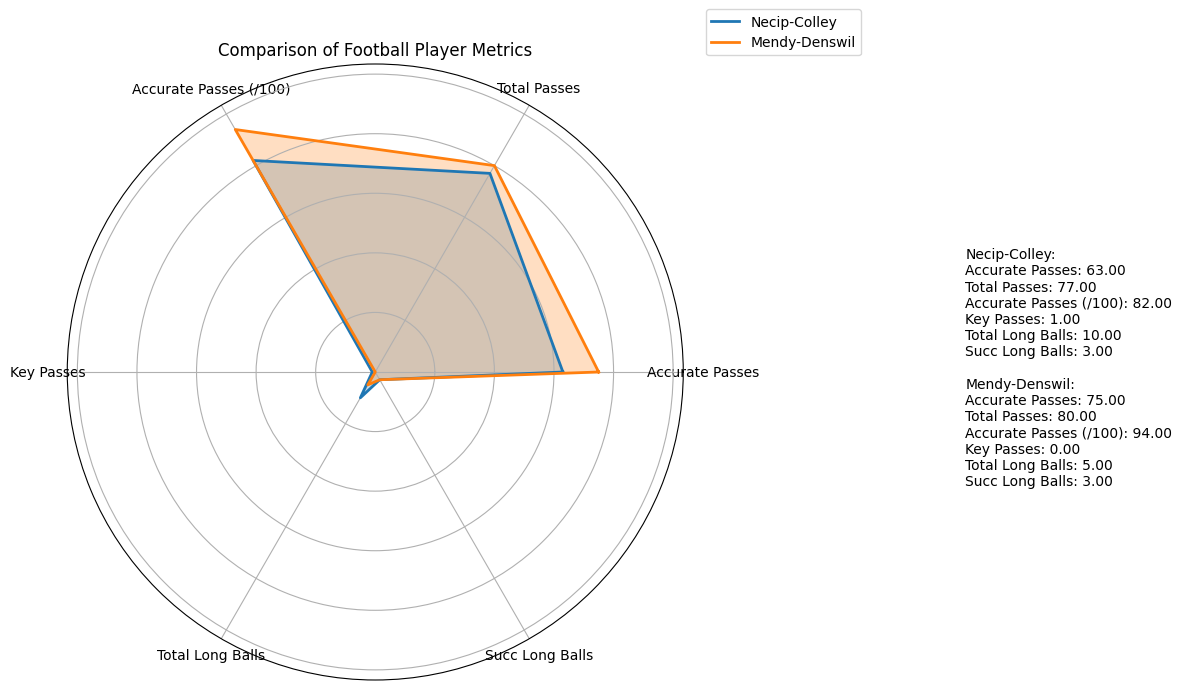

In [27]:
group1 = df[df['Name'].isin(['Necip Uysal', 'Omar Colley'])].sum(numeric_only=True)
group2 = df[df['Name'].isin(['Batista Mendy', 'Stefano Denswil'])].sum(numeric_only=True)

# Accurate Passes (/100) ortalamalarını ekleme
group1['Accurate Passes (/100)'] = df[df['Name'].isin(['Necip Uysal', 'Omar Colley'])]['Accurate Passes (/100)'].mean()
group2['Accurate Passes (/100)'] = df[df['Name'].isin(['Batista Mendy', 'Stefano Denswil'])]['Accurate Passes (/100)'].mean()

# Radar grafiği için verileri hazırlama
categories = ['Accurate Passes', 'Total Passes', 'Accurate Passes (/100)', 'Key Passes', 
              'Total Long Balls', 'Succ Long Balls']
num_vars = len(categories)

# Radar grafiği için açıları hesaplama
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Tam bir daire oluşturmak için

# Radar grafiği verilerini kapatmak için
def create_radar_data(row):
    values = row[categories].tolist()
    values += values[:1]
    return values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Grupların verilerini ekleme
values1 = create_radar_data(group1)
ax.plot(angles, values1, label='Necip-Colley', linewidth=2, linestyle='solid')
ax.fill(angles, values1, alpha=0.25)

values2 = create_radar_data(group2)
ax.plot(angles, values2, label='Mendy-Denswil', linewidth=2, linestyle='solid')
ax.fill(angles, values2, alpha=0.25)

# Grafik ayarları
ax.set_ylim(0, max(max(values1), max(values2)) * 1.1)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Legend için verileri hazırlama
legend_data = []
legend_data.append(f"Necip-Colley:\n" + "\n".join([f"{cat}: {group1[cat]:.2f}" for cat in categories]))
legend_data.append(f"Mendy-Denswil:\n" + "\n".join([f"{cat}: {group2[cat]:.2f}" for cat in categories]))

# Legend'ı ekleme
plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

plt.title('Comparison of Football Player Metrics')
plt.show()


Mendy ve Denswil ikilisi Necip-Colley'e göre daha fazla pas denemesinde bulunmuş, daha fazla başarılı pas atmışlar ve daha fazla isabet oranına sahipler. Necip Colley defansif aksiyon olarak diğer ikiliden öndeyken Denswil-Mendy ikilisi pas anlamında Necip Colley'e göre öndeler. Ancak uzun top denemelerini inceleyince Denswil-Mendy ikilisi daha geride. Pivot Santrafor ile oyun oynayan Trabzonspor stoperleri Beşiktaş stoperlerine göre daha az uzun top denemsinde bulunmuşlar. Bunun sebebi Trabzonspor'un topu Onuachu'ya stoperler ile daha az iletmeye çalıştığını gösterebilir. Birazdan kanat ve orta saha oyuncularını incelediğimizde buna değineceğiz. Ancak şimdi Denswil ve Mendy ikilisini karşılaştıralım.

# Trabzonspor stoperlerinin karşılaştırılması

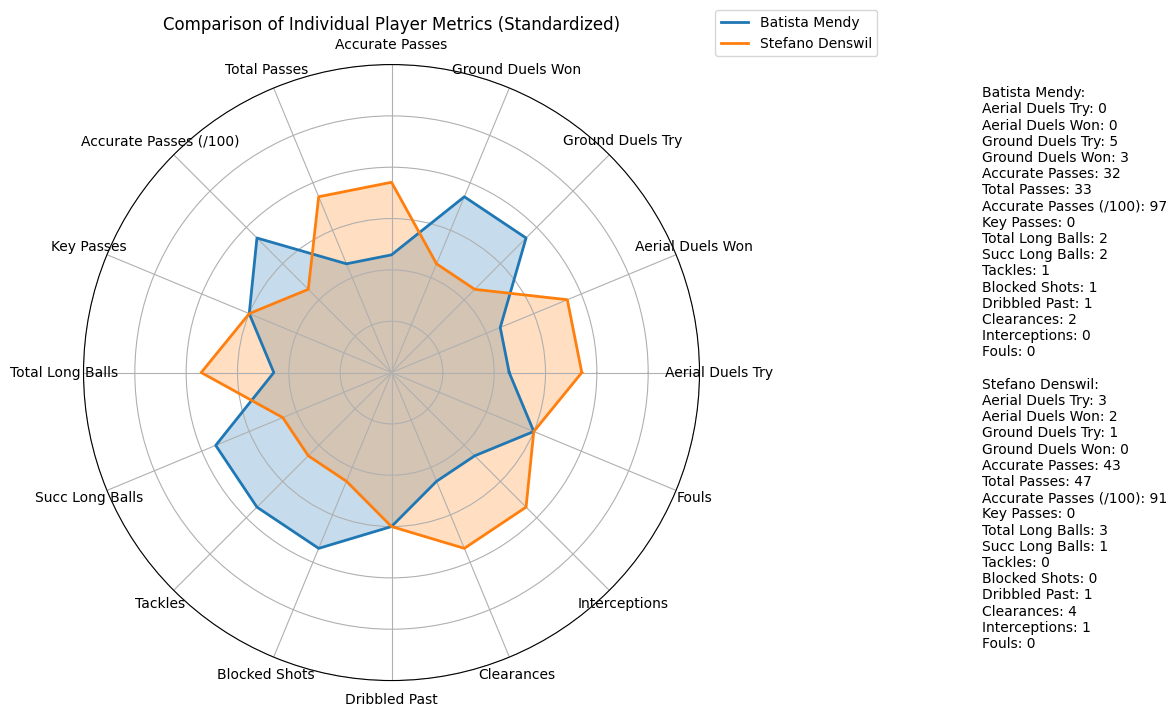

In [37]:
# Batista Mendy ve Stefano Denswil için verileri filtreleme
players = df[df['Name'].isin(['Batista Mendy', 'Stefano Denswil'])]

# Standartize etme fonksiyonu
def standardize(series):
    if series.std() == 0:
        return series - series.mean()  # Eğer std 0 ise sadece ortalamayı çıkar
    return (series - series.mean()) / series.std()

# Sayısal sütunları standartize etme
categories = ['Aerial Duels Try', 'Aerial Duels Won', 'Ground Duels Try', 'Ground Duels Won', 
              'Accurate Passes', 'Total Passes', 'Accurate Passes (/100)', 'Key Passes', 
              'Total Long Balls', 'Succ Long Balls', 'Tackles', 'Blocked Shots', 
              'Dribbled Past', 'Clearances', 'Interceptions','Fouls']

# Standartize edilmiş DataFrame oluşturma
standardized_df = players.copy()
standardized_df[categories] = standardized_df[categories].apply(standardize)

# Radar grafiği için verileri hazırlama
num_vars = len(categories)

# Radar grafiği için açıları hesaplama
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Tam bir daire oluşturmak için

# Radar grafiği verilerini kapatmak için
def create_radar_data(row):
    values = row[categories].tolist()
    values += values[:1]
    return values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Her oyuncunun verilerini ekleme
for idx, player in standardized_df.iterrows():
    values = create_radar_data(player)
    ax.plot(angles, values, label=player['Name'], linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

# Grafik ayarları
ax.set_ylim(-3, 3)  # Standart sapmaya göre geniş bir aralık belirleme
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Legend için verileri hazırlama
legend_data = []
for i, row in players.iterrows():  # Orijinal df'den alınan değerler
    legend_data.append(f"{row['Name']}:\n" + "\n".join([f"{cat}: {row[cat]}" for cat in categories]))

# Legend'ı ekleme
plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

plt.title('Comparison of Individual Player Metrics (Standardized)')
plt.show()


Müdahale ve pas konusunda Mendy daha iyi görünürken Denswil ise daha çok defansif aksiyonlarda yer almış olarak gözüküyor. Ancak tabloyu standardize ettiğimiz için sayısal istatistikleri incelememiz lazım. 

Denswil hava topu mücadelelerine girerken Mendy ise yerde olan mücadelere katılmış olarak gözüküyor.Mendy daha az pas atarken başarı yüzdesi olarak Denswil'den iyi gözüküyor. Pas başarı yüzdesinin yüksek olma sebebi Mendy'nin daha risksiz oynaması olabilir. Ancak 2 uzun top denemesinde de başarılı olmuş. İki futbolcu da 9 defansif aksiyonda yer almış. İkisi de 5 defansif aksiyonda da başarılı olmuş. Ancak Mendy'nin hava toplarına hiç katılmamış olması ve pas başarı oranı daha düşük olan Denswil'in daha fazla pas denemesinde bulunması ikilinin birbirini tamamlamadığını gösteriyor. Ayrıca ikili birer sefer adam kaçırmış. İkili'nin ilginç bir şekilde hiç faulü bulunmuyor.

# Beşiktaş stoperlerinin karşılaştırılması

Aynı karşılaştırmayı Beşiktaş stoperleri için yapalım

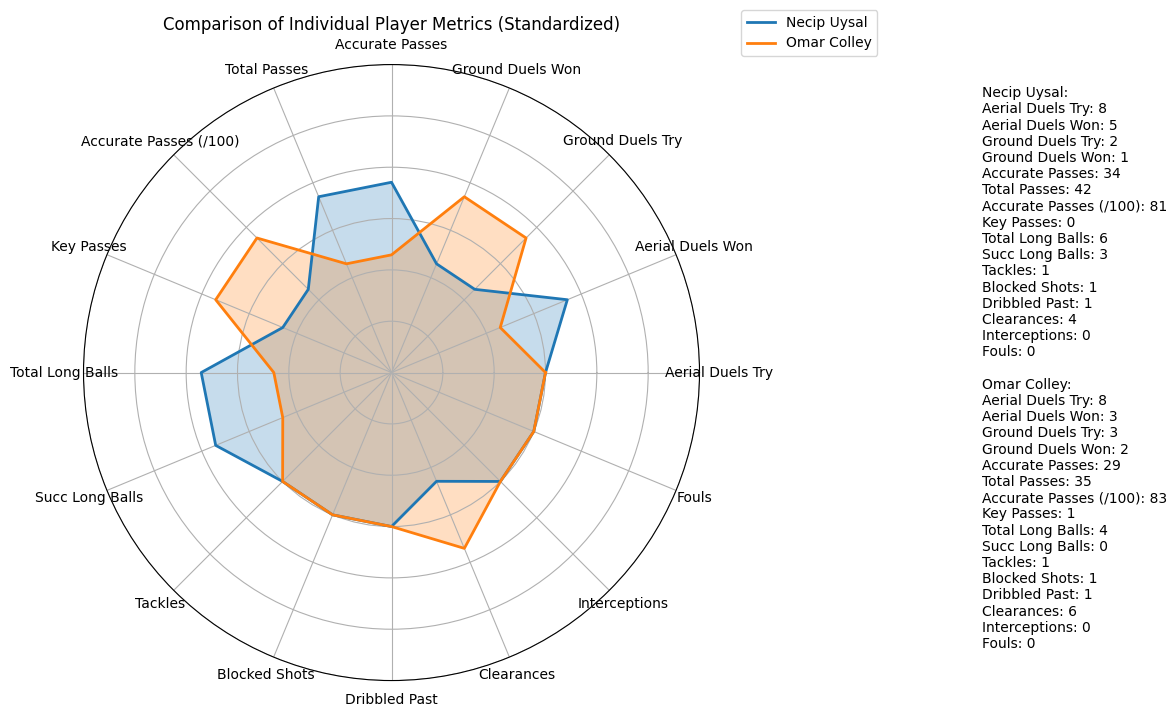

In [7]:
# Batista Mendy ve Stefano Denswil için verileri filtreleme
players = df[df['Name'].isin(['Necip Uysal', 'Omar Colley'])]

# Standartize etme fonksiyonu
def standardize(series):
    if series.std() == 0:
        return series - series.mean()  # Eğer std 0 ise sadece ortalamayı çıkar
    return (series - series.mean()) / series.std()

# Sayısal sütunları standartize etme
categories = ['Aerial Duels Try', 'Aerial Duels Won', 'Ground Duels Try', 'Ground Duels Won', 
              'Accurate Passes', 'Total Passes', 'Accurate Passes (/100)', 'Key Passes', 
              'Total Long Balls', 'Succ Long Balls', 'Tackles', 'Blocked Shots', 
              'Dribbled Past', 'Clearances', 'Interceptions','Fouls']

# Standartize edilmiş DataFrame oluşturma
standardized_df = players.copy()
standardized_df[categories] = standardized_df[categories].apply(standardize)

# Radar grafiği için verileri hazırlama
num_vars = len(categories)

# Radar grafiği için açıları hesaplama
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Tam bir daire oluşturmak için

# Radar grafiği verilerini kapatmak için
def create_radar_data(row):
    values = row[categories].tolist()
    values += values[:1]
    return values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Her oyuncunun verilerini ekleme
for idx, player in standardized_df.iterrows():
    values = create_radar_data(player)
    ax.plot(angles, values, label=player['Name'], linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

# Grafik ayarları
ax.set_ylim(-3, 3)  # Standart sapmaya göre geniş bir aralık belirleme
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Legend için verileri hazırlama
legend_data = []
for i, row in players.iterrows():  # Orijinal df'den alınan değerler
    legend_data.append(f"{row['Name']}:\n" + "\n".join([f"{cat}: {row[cat]}" for cat in categories]))

# Legend'ı ekleme
plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

plt.title('Comparison of Individual Player Metrics (Standardized)')
plt.show()


Necip Uysal 17, Colley ise 20 defansif aksiyonda bulunmuş. Necip 17 aksiyonun 11'inde, Colley ise 20 aksiyonun 13'ünde başarılı olmuş. İkilinin pas başarı oranları birbirine yakın. İkisi de yakın sayıda pas denemesinde bulunmuş. Colley uzun top denemelerinde hiç başarılı olamamış ve totalde 3 denemesi var. Necip ise 6 denemenin 3'ünde başarılı olmuş. İkili pas olarak Denswil ve Mendy kadar başarılı olamasa da defansif anlamda daha fazla aksiyonda yer almışlar. Ve daha fazla sayıda başarılı defansif aksiyonları var. 

Özetlemek gerekirse Necip ve Colley'in başarılı defansif aksiyon sayısı Mendy-Denswil ikilisinin 4 katından daha fazla. Pas konusundaa ise Necip Colley ikilisi Mendy Denswil ikilisi kadar başarılı değil. Ve daha fazla uzun top denemesinde bulunmuşlar

# Sağ-Sol Bek oyuncularının karşılaştırılması

Bek oyuncularını inceleyelim.

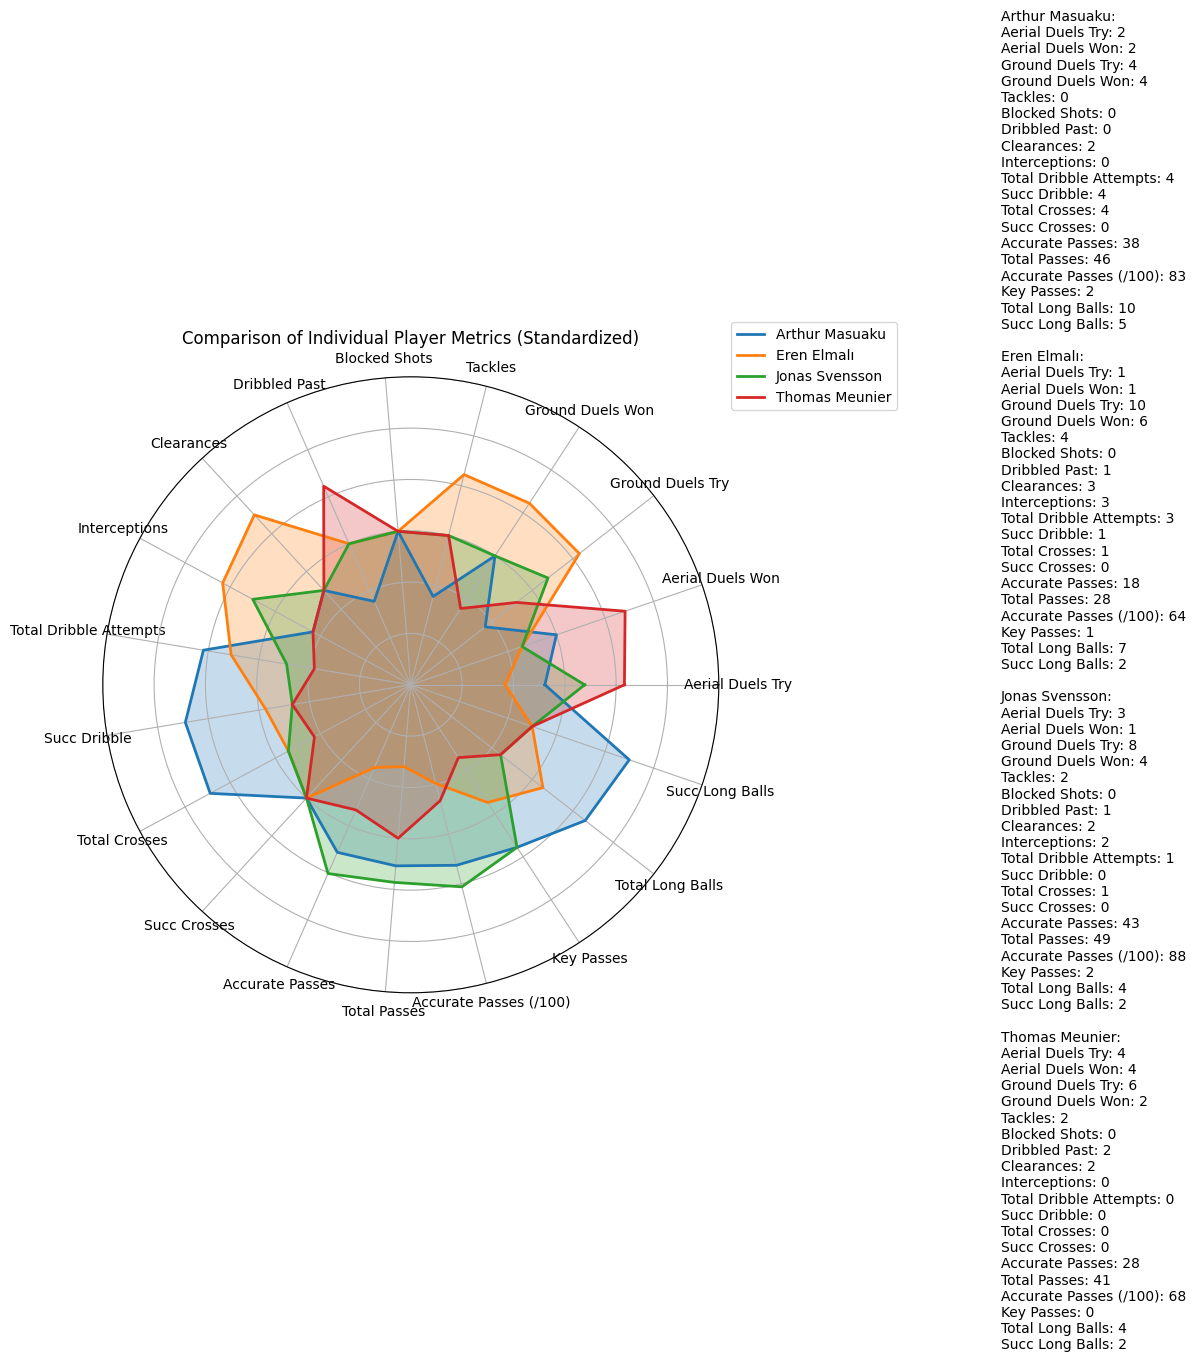

In [8]:
players = df[df['Name'].isin(['Arthur Masuaku', 'Jonas Svensson', 'Thomas Meunier', 'Eren Elmalı'])]

if players.empty:
    print("İlgili oyuncular bulunamadı.")
else:
    # Radar grafiği için verileri hazırlama
    categories = ['Aerial Duels Try', 'Aerial Duels Won', 'Ground Duels Try', 'Ground Duels Won', 
                  'Tackles', 'Blocked Shots', 'Dribbled Past', 'Clearances', 'Interceptions','Total Dribble Attempts','Succ Dribble','Total Crosses','Succ Crosses','Accurate Passes', 'Total Passes', 'Accurate Passes (/100)', 'Key Passes', 
              'Total Long Balls', 'Succ Long Balls']
    num_vars = len(categories)

    # Standartize edilmiş DataFrame oluşturma
standardized_df = players.copy()
standardized_df[categories] = standardized_df[categories].apply(standardize)

# Radar grafiği için verileri hazırlama
num_vars = len(categories)

# Radar grafiği için açıları hesaplama
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Tam bir daire oluşturmak için

# Radar grafiği verilerini kapatmak için
def create_radar_data(row):
    values = row[categories].tolist()
    values += values[:1]
    return values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Her oyuncunun verilerini ekleme
for idx, player in standardized_df.iterrows():
    values = create_radar_data(player)
    ax.plot(angles, values, label=player['Name'], linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

# Grafik ayarları
ax.set_ylim(-3, 3)  # Standart sapmaya göre geniş bir aralık belirleme
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Legend için verileri hazırlama
legend_data = []
for i, row in players.iterrows():  # Orijinal df'den alınan değerler
    legend_data.append(f"{row['Name']}:\n" + "\n".join([f"{cat}: {row[cat]}" for cat in categories]))

# Legend'ı ekleme
plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

plt.title('Comparison of Individual Player Metrics (Standardized)')
plt.show()

İlk gözümüze çarpan değer Beşiktaş'ın bek oyuncularının, Trabzsonspor bek oyuncularına göre daha yüksek bir pas isabetine sahip olmaları. Ancak şöyle bir durum var ki Beşiktaş'ın bek oyuncuları 5, Trabzonspor'un bek oyuncuları ise 1 orta denemesinde bulunmuş. Ve hiçbir orta başarılı olmamış.

Masuaku ise dripling konusunda ciddi bir performans ortaya koymuş. 4 dripling denemesinin 4'ünde de başarılı olmuş. Ayrıca Meunier ve Masuaku tüm hava topu mücadelelerini kazanmış. Ancak Masuaku yerde girdiği tüm ikili mücadeleleri de kazanmış.

Svensson ve Eren Elmalı ise daha çok yerde ikili mücadeleye katılmışlar. 

Meunier ve Eren totalde 3 kere adam kaçırırken Svensson ve Masuaku totalde 1 kere adam kaçırmışlar. 

Masuaku totalde 8, Svensson totalde 18 defansif aksiyonda yer almış. Masuaku 8 defansif aksiyonun tamamında başarılı olmuş ayrıca bekler arasında en fazla pas yapan oyuncu. Pas başarı yüzdesi ise %84. Dripling konusunda da mücadele konusunda da diğer beklere nazaran çok daha iyi bir başarı yüzdesine sahip.

Trabzonspor tarafına gelecek olursak;
Eren Elmalı totalde 22, Meunier ise totalde 16 defansif aksiyonda yer almış. Eren 22 aksiyonun 14'ünde, Meunier ise 16 aksiyonun 10'unda başarılı olmuş. Bu ikili daha fazla defansif aksiyonda yer almış olsa da özellikle pas ve orta konusunda Beşiktaş beklerine göre geride kalmışlar. Masuaku ve Svensson totalde 81 başarılı pas yapmış, Eren ve Meunier ise totalde 46 başarılı pas yapmış. 

Oyunun kurulumu ve takımının pas oyununa katılımı konusunda Eren ve Meunier Beşiktaş beklerine göre geride kalmışlar.

# Orta Saha oyuncularının karşılaştırılması

Şimdi orta saha oyuncularını inceleyelim.

Öncelikle pas, dripling ve şut değerlerini ele alalım. Mücadele ve defansif aksiyonları ilerleyen aşamada inceleyelim.

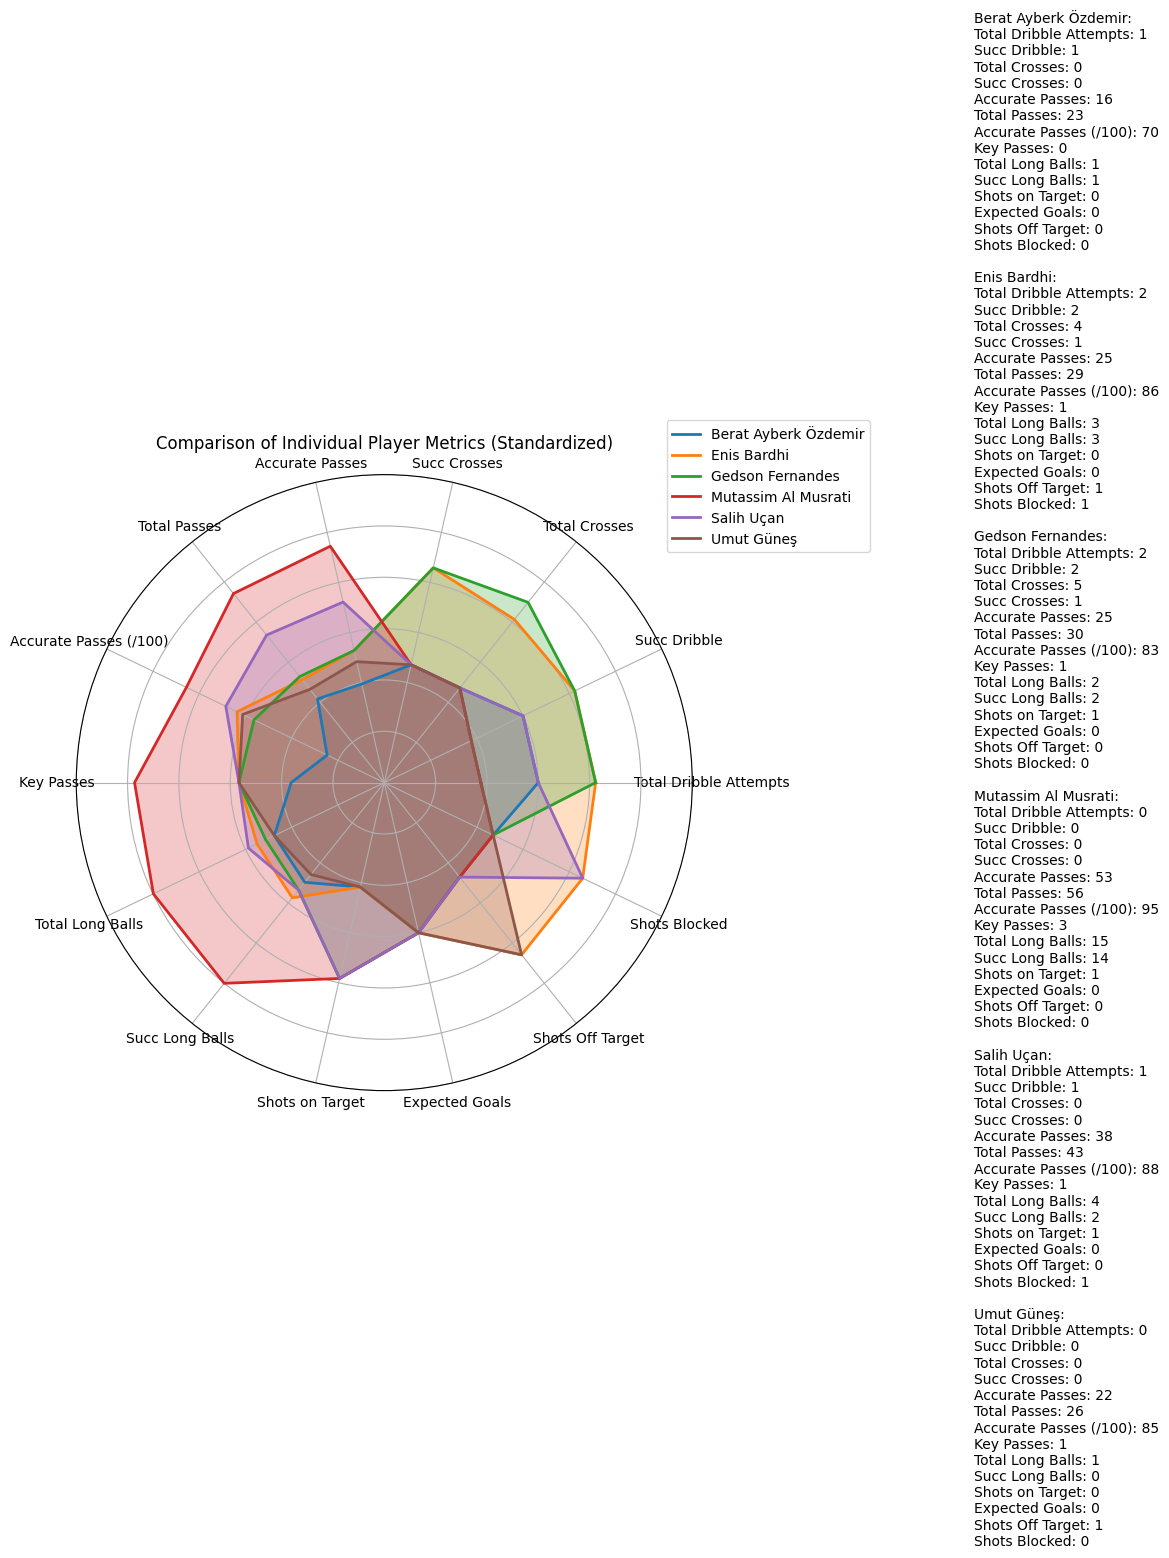

In [10]:
players = df[df['Name'].isin(['Gedson Fernandes','Mutassim Al Musrati','Salih Uçan','Berat Ayberk Özdemir','Umut Güneş','Enis Bardhi'])]

if players.empty:
    print("İlgili oyuncular bulunamadı.")
else:
    # Radar grafiği için verileri hazırlama
    categories = ['Total Dribble Attempts','Succ Dribble','Total Crosses','Succ Crosses','Accurate Passes', 'Total Passes', 'Accurate Passes (/100)', 'Key Passes', 
              'Total Long Balls', 'Succ Long Balls','Shots on Target','Expected Goals','Shots Off Target','Shots Blocked']
    num_vars = len(categories)

    # Standartize edilmiş DataFrame oluşturma
standardized_df = players.copy()
standardized_df[categories] = standardized_df[categories].apply(standardize)

# Radar grafiği için verileri hazırlama
num_vars = len(categories)

# Radar grafiği için açıları hesaplama
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Tam bir daire oluşturmak için

# Radar grafiği verilerini kapatmak için
def create_radar_data(row):
    values = row[categories].tolist()
    values += values[:1]
    return values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Her oyuncunun verilerini ekleme
for idx, player in standardized_df.iterrows():
    values = create_radar_data(player)
    ax.plot(angles, values, label=player['Name'], linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

# Grafik ayarları
ax.set_ylim(-3, 3)  # Standart sapmaya göre geniş bir aralık belirleme
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Legend için verileri hazırlama
legend_data = []
for i, row in players.iterrows():  # Orijinal df'den alınan değerler
    legend_data.append(f"{row['Name']}:\n" + "\n".join([f"{cat}: {row[cat]}" for cat in categories]))

# Legend'ı ekleme
plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

plt.title('Comparison of Individual Player Metrics (Standardized)')
plt.show()

Al Musrati total pas denemesi ve başarılı pas sayısı olarak tüm orta saha oyuncularından daha üstün bir istatistiğe sahip. Orta sahalar arasında en çok pas denemesinde bulunan Salih Uçan. Ve Salih Uçan isabet oranı olarak da ikinci sırada. Trabzonspor orta sahaları Beşiktaş orta sahalarına göre çok daha düşük pas istatistiklerine sahip. 


# Orta Saha Triolarının karşılaştırılması

Orta sahaları trio olarak karşılaştıralım. 

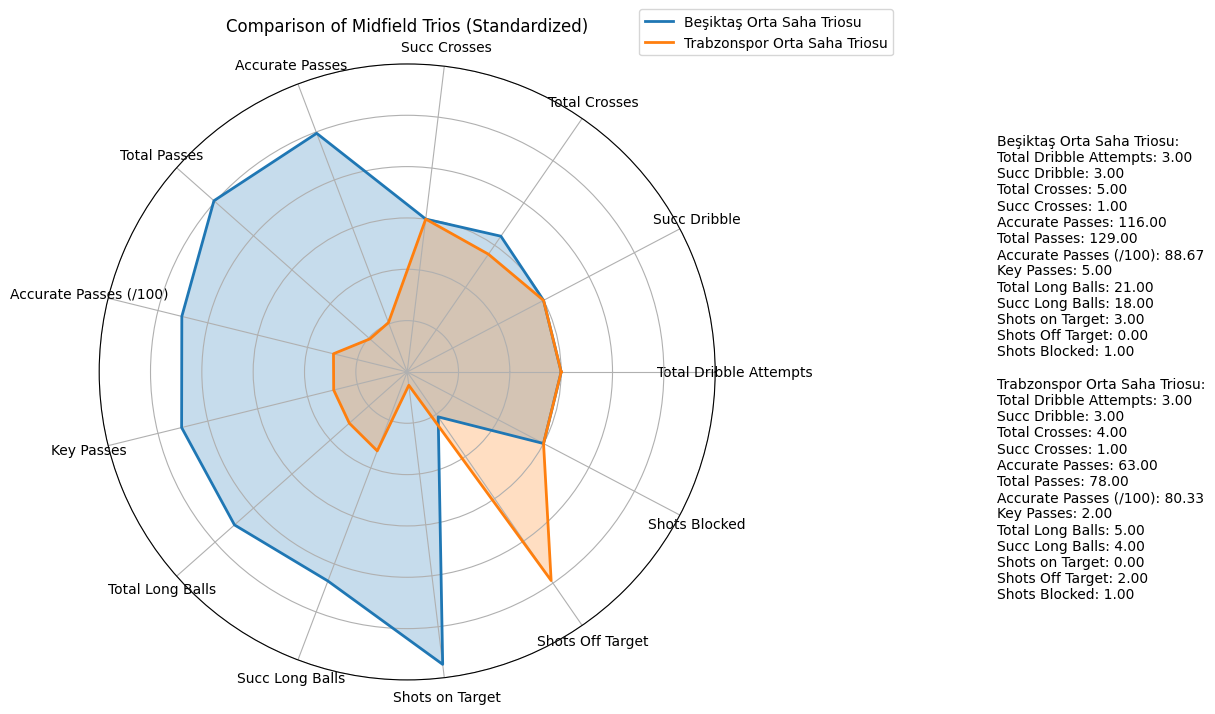

In [15]:
players = df[df['Name'].isin(['Gedson Fernandes', 'Mutassim Al Musrati', 'Salih Uçan', 'Berat Ayberk Özdemir', 'Umut Güneş', 'Enis Bardhi'])]

if players.empty:
    print("İlgili oyuncular bulunamadı.")
else:
    # Kategorileri belirleme
    categories = ['Total Dribble Attempts', 'Succ Dribble', 'Total Crosses', 'Succ Crosses', 'Accurate Passes', 
                  'Total Passes', 'Accurate Passes (/100)', 'Key Passes', 'Total Long Balls', 'Succ Long Balls',
                  'Shots on Target', 'Shots Off Target', 'Shots Blocked']
    
    # Standartize etme fonksiyonu
    def standardize(series):
        if series.std() == 0:
            return series - series.mean()  # Eğer std 0 ise sadece ortalamayı çıkar
        return (series - series.mean()) / series.std()

    # Standartize edilmiş DataFrame oluşturma
    standardized_df = players.copy()
    standardized_df[categories] = standardized_df[categories].apply(standardize)

    # Grupları oluşturma (normal değerlerle)
    group1_normal = players[players['Name'].isin(['Gedson Fernandes', 'Mutassim Al Musrati', 'Salih Uçan'])].sum(numeric_only=True).astype(float)
    group2_normal = players[players['Name'].isin(['Berat Ayberk Özdemir', 'Umut Güneş', 'Enis Bardhi'])].sum(numeric_only=True).astype(float)

    # Accurate Passes (/100) ortalamalarını ekleme
    group1_normal['Accurate Passes (/100)'] = players[players['Name'].isin(['Gedson Fernandes', 'Mutassim Al Musrati', 'Salih Uçan'])]['Accurate Passes (/100)'].mean()
    group2_normal['Accurate Passes (/100)'] = players[players['Name'].isin(['Berat Ayberk Özdemir', 'Umut Güneş', 'Enis Bardhi'])]['Accurate Passes (/100)'].mean()

    # Grupları oluşturma (standartize edilmiş değerlerle)
    group1 = standardized_df[standardized_df['Name'].isin(['Gedson Fernandes', 'Mutassim Al Musrati', 'Salih Uçan'])].sum(numeric_only=True).astype(float)
    group2 = standardized_df[standardized_df['Name'].isin(['Berat Ayberk Özdemir', 'Umut Güneş', 'Enis Bardhi'])].sum(numeric_only=True).astype(float)

    # Radar grafiği için verileri hazırlama
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Tam bir daire oluşturmak için

    def create_radar_data(row):
        values = row[categories].tolist()
        values += values[:1]
        return values

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Grupların verilerini ekleme
    values1 = create_radar_data(group1)
    ax.plot(angles, values1, label='Beşiktaş Orta Saha Triosu', linewidth=2, linestyle='solid')
    ax.fill(angles, values1, alpha=0.25)

    values2 = create_radar_data(group2)
    ax.plot(angles, values2, label='Trabzonspor Orta Saha Triosu', linewidth=2, linestyle='solid')
    ax.fill(angles, values2, alpha=0.25)

    # Grafik ayarları
    ax.set_ylim(-3, 3)  # Standart sapmaya göre geniş bir aralık belirleme
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    # Legend için verileri hazırlama (normal değerlerle)
    legend_data = []
    legend_data.append(f"Beşiktaş Orta Saha Triosu:\n" + "\n".join([f"{cat}: {group1_normal[cat]:.2f}" for cat in categories]))
    legend_data.append(f"Trabzonspor Orta Saha Triosu:\n" + "\n".join([f"{cat}: {group2_normal[cat]:.2f}" for cat in categories]))

    # Legend'ı ekleme
    plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

    plt.title('Comparison of Midfield Trios (Standardized)')
    plt.show()


Beşiktaş orta saha triosu sadece dripling ve orta açma konusunda Trabzonspor triosu ile eşit değerlere sahip. Onun dışında pas, şut ve kilit pas konusunda Beşiktaş Triosu, Trabzonspor Triosuna göre çok iyi durumda. Beşiktaş triosunun başarılı pas sayısı 100'ü geçerken, Trabzon triosunun total pas sayısı bile 80 den daha az. 

Ayrıca Trabzonspor'un orta saha triosunun hiç kaleyi bulan bir şutu bulunmuyor. Beşiktaş orta saha triosunun ise kaleyi bulan totalde 3 şutu var ve bu 3 şutun 2'si golle sonuçlanmış. Trabzonspor ortasahasına göre hem oyunu daha fazla hakimiyeti altına alan hem de skor olarak takımına daha çok katkı veren bir görüntü çiziyor. Ayrıca kilit pas konusunda da Beşiktaş orta saha triosu, Trabzonspor orta saha triosunun iki katından fazla bir değere sahip. Hücumu yönlendirme konusunda da Beşiktaş orta saha triosu çok önemli bir avantaj sağlamışlar.

# Beşiktaş Orta Saha oyuncularının bireysel karşılaştırılması

Şimdi de Beşiktaş orta sahalarını kendi arasında inceleyelim.

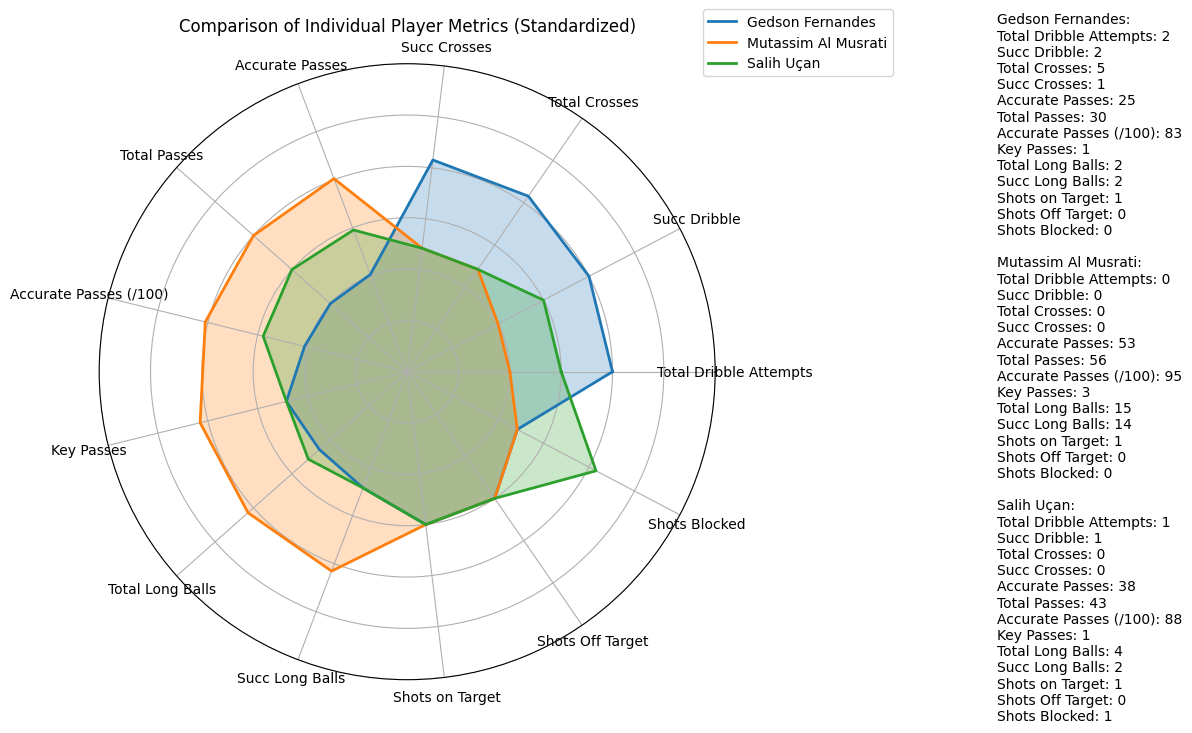

In [16]:
players = df[df['Name'].isin(['Gedson Fernandes','Mutassim Al Musrati','Salih Uçan'])]

if players.empty:
    print("İlgili oyuncular bulunamadı.")
else:
    # Radar grafiği için verileri hazırlama
    categories = ['Total Dribble Attempts','Succ Dribble','Total Crosses','Succ Crosses','Accurate Passes', 'Total Passes', 'Accurate Passes (/100)', 'Key Passes', 
              'Total Long Balls', 'Succ Long Balls','Shots on Target','Shots Off Target','Shots Blocked']
    num_vars = len(categories)

    # Standartize edilmiş DataFrame oluşturma
standardized_df = players.copy()
standardized_df[categories] = standardized_df[categories].apply(standardize)

# Radar grafiği için verileri hazırlama
num_vars = len(categories)

# Radar grafiği için açıları hesaplama
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Tam bir daire oluşturmak için

# Radar grafiği verilerini kapatmak için
def create_radar_data(row):
    values = row[categories].tolist()
    values += values[:1]
    return values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Her oyuncunun verilerini ekleme
for idx, player in standardized_df.iterrows():
    values = create_radar_data(player)
    ax.plot(angles, values, label=player['Name'], linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

# Grafik ayarları
ax.set_ylim(-3, 3)  # Standart sapmaya göre geniş bir aralık belirleme
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Legend için verileri hazırlama
legend_data = []
for i, row in players.iterrows():  # Orijinal df'den alınan değerler
    legend_data.append(f"{row['Name']}:\n" + "\n".join([f"{cat}: {row[cat]}" for cat in categories]))

# Legend'ı ekleme
plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

plt.title('Comparison of Individual Player Metrics (Standardized)')
plt.show()

Gedson oyunun daha çok dripling aşamasında diğer futbolculara göre yer almış. Pas konusunda Salih ve Al Musrati kadar pas trafiğine dahil olamamış olsa da birazdan mücadele anlamında incelediğimizde o alanda da mı pasif kalmış, inceleyeceğiz.

Ancak grafiği incelediğimizde Al Musrati, Beşiktaş orta sahalarına göre de Trabzonspor orta sahalarına göre de oyuna hükmeden ve oyunu yönlendiren bir performans sergilemiş. 15 uzun topta 14 başarı ve totalde %95 pas başarı oranı gerçekten ciddi bir istatistik.

# Orta Saha oyuncularının Mücadele Karşılaştırmaları

 Şimdi de orta saha futbolcularının mücadele değerlerini inceleyelim.

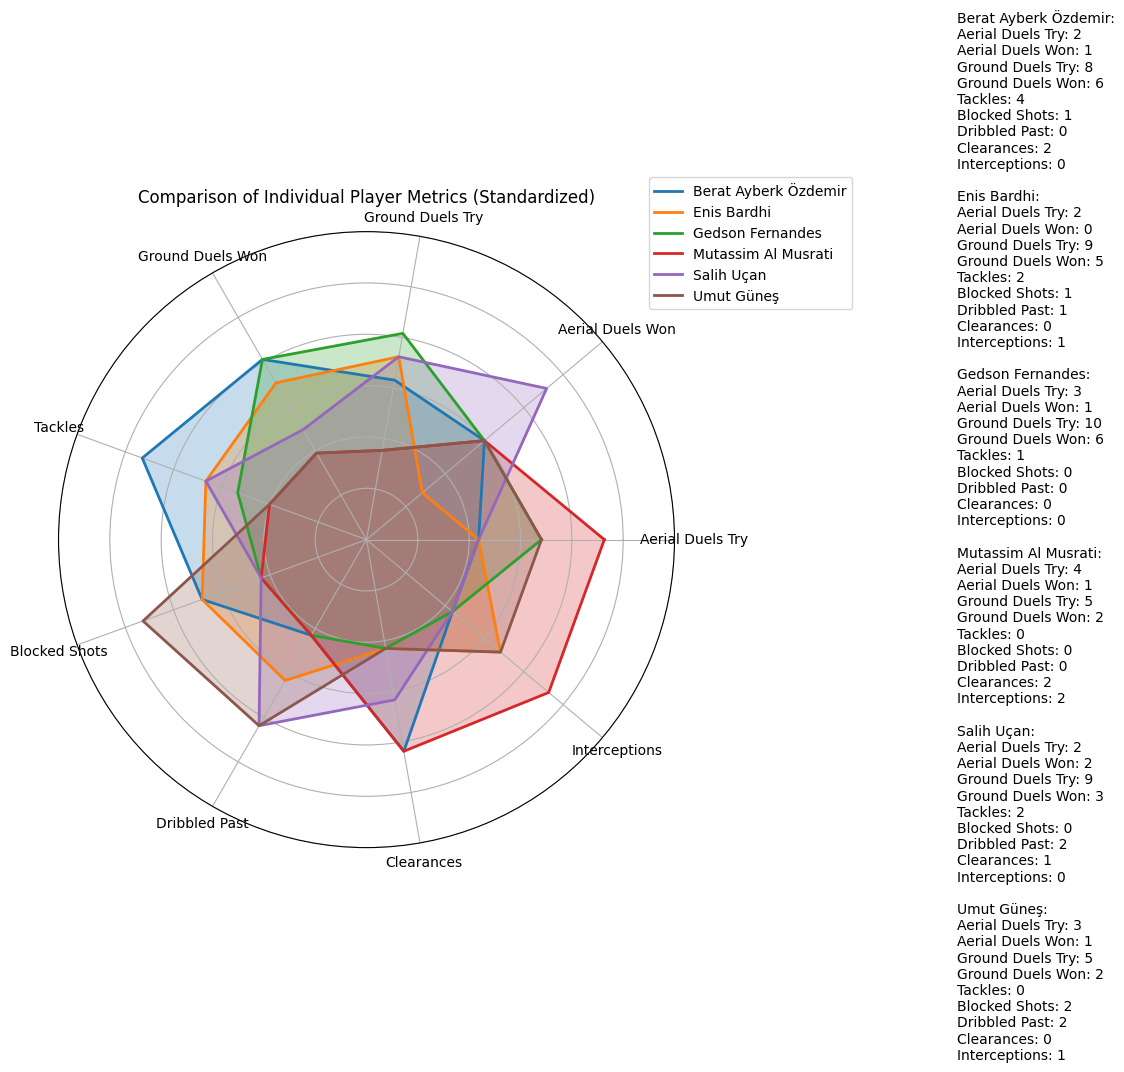

In [17]:
players = df[df['Name'].isin(['Gedson Fernandes','Mutassim Al Musrati','Salih Uçan', 'Berat Ayberk Özdemir', 'Umut Güneş', 'Enis Bardhi'])]

if players.empty:
    print("İlgili oyuncular bulunamadı.")
else:
    # Radar grafiği için verileri hazırlama
    categories = ['Aerial Duels Try', 'Aerial Duels Won', 'Ground Duels Try', 'Ground Duels Won', 
                  'Tackles', 'Blocked Shots', 'Dribbled Past', 'Clearances', 'Interceptions']
    num_vars = len(categories)

    # Standartize edilmiş DataFrame oluşturma
standardized_df = players.copy()
standardized_df[categories] = standardized_df[categories].apply(standardize)

# Radar grafiği için verileri hazırlama
num_vars = len(categories)

# Radar grafiği için açıları hesaplama
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Tam bir daire oluşturmak için

# Radar grafiği verilerini kapatmak için
def create_radar_data(row):
    values = row[categories].tolist()
    values += values[:1]
    return values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Her oyuncunun verilerini ekleme
for idx, player in standardized_df.iterrows():
    values = create_radar_data(player)
    ax.plot(angles, values, label=player['Name'], linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

# Grafik ayarları
ax.set_ylim(-3, 3)  # Standart sapmaya göre geniş bir aralık belirleme
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Legend için verileri hazırlama
legend_data = []
for i, row in players.iterrows():  # Orijinal df'den alınan değerler
    legend_data.append(f"{row['Name']}:\n" + "\n".join([f"{cat}: {row[cat]}" for cat in categories]))

# Legend'ı ekleme
plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

plt.title('Comparison of Individual Player Metrics (Standardized)')
plt.show()

En az yerde ikili mücadeleye giren futbolcular Umut GÜneş ve Al Musrati olmuş. Ve yerde mücadele konusunda en düşük başarı oranına sahip futbolcu Salih Uçan olmuş.

En çok yerde ikili mücadeleye giren Gedson Fernandes olurken, en başarılı yerde ikili mücadele kazanma oranına sahip futbolcu %75 ile Berat Özdemir olmuş. Ancak en çok yerde ikili mücadeleye giren futbolcu olan Gedson'un başarı oranı %60 ve orta sahalarda en çok yerde ikili mücadele başarı oranına sahip Berat'ın hemen arkasından geliyor.

En çok hava topu mücadelesine giren orta saha Al Musrati olurken, hava topu mücadelesinde en yüksek başarı oranına sahip orta saha %50 ile Berat olmuş. Ancak Berat, Salih ve Bardhi 2 mücadele ile en az hava topu mücadelesine katılan futbolcular.

# Kanat Oyuncuları

Şimdi de kanat oyuncularını inceleyelim

> Ancak sonradan giren oyuncular olduğu için oyuncuların kaç dakika oynadığı değerini de göz önünde bulundurmamız gerekiyor.

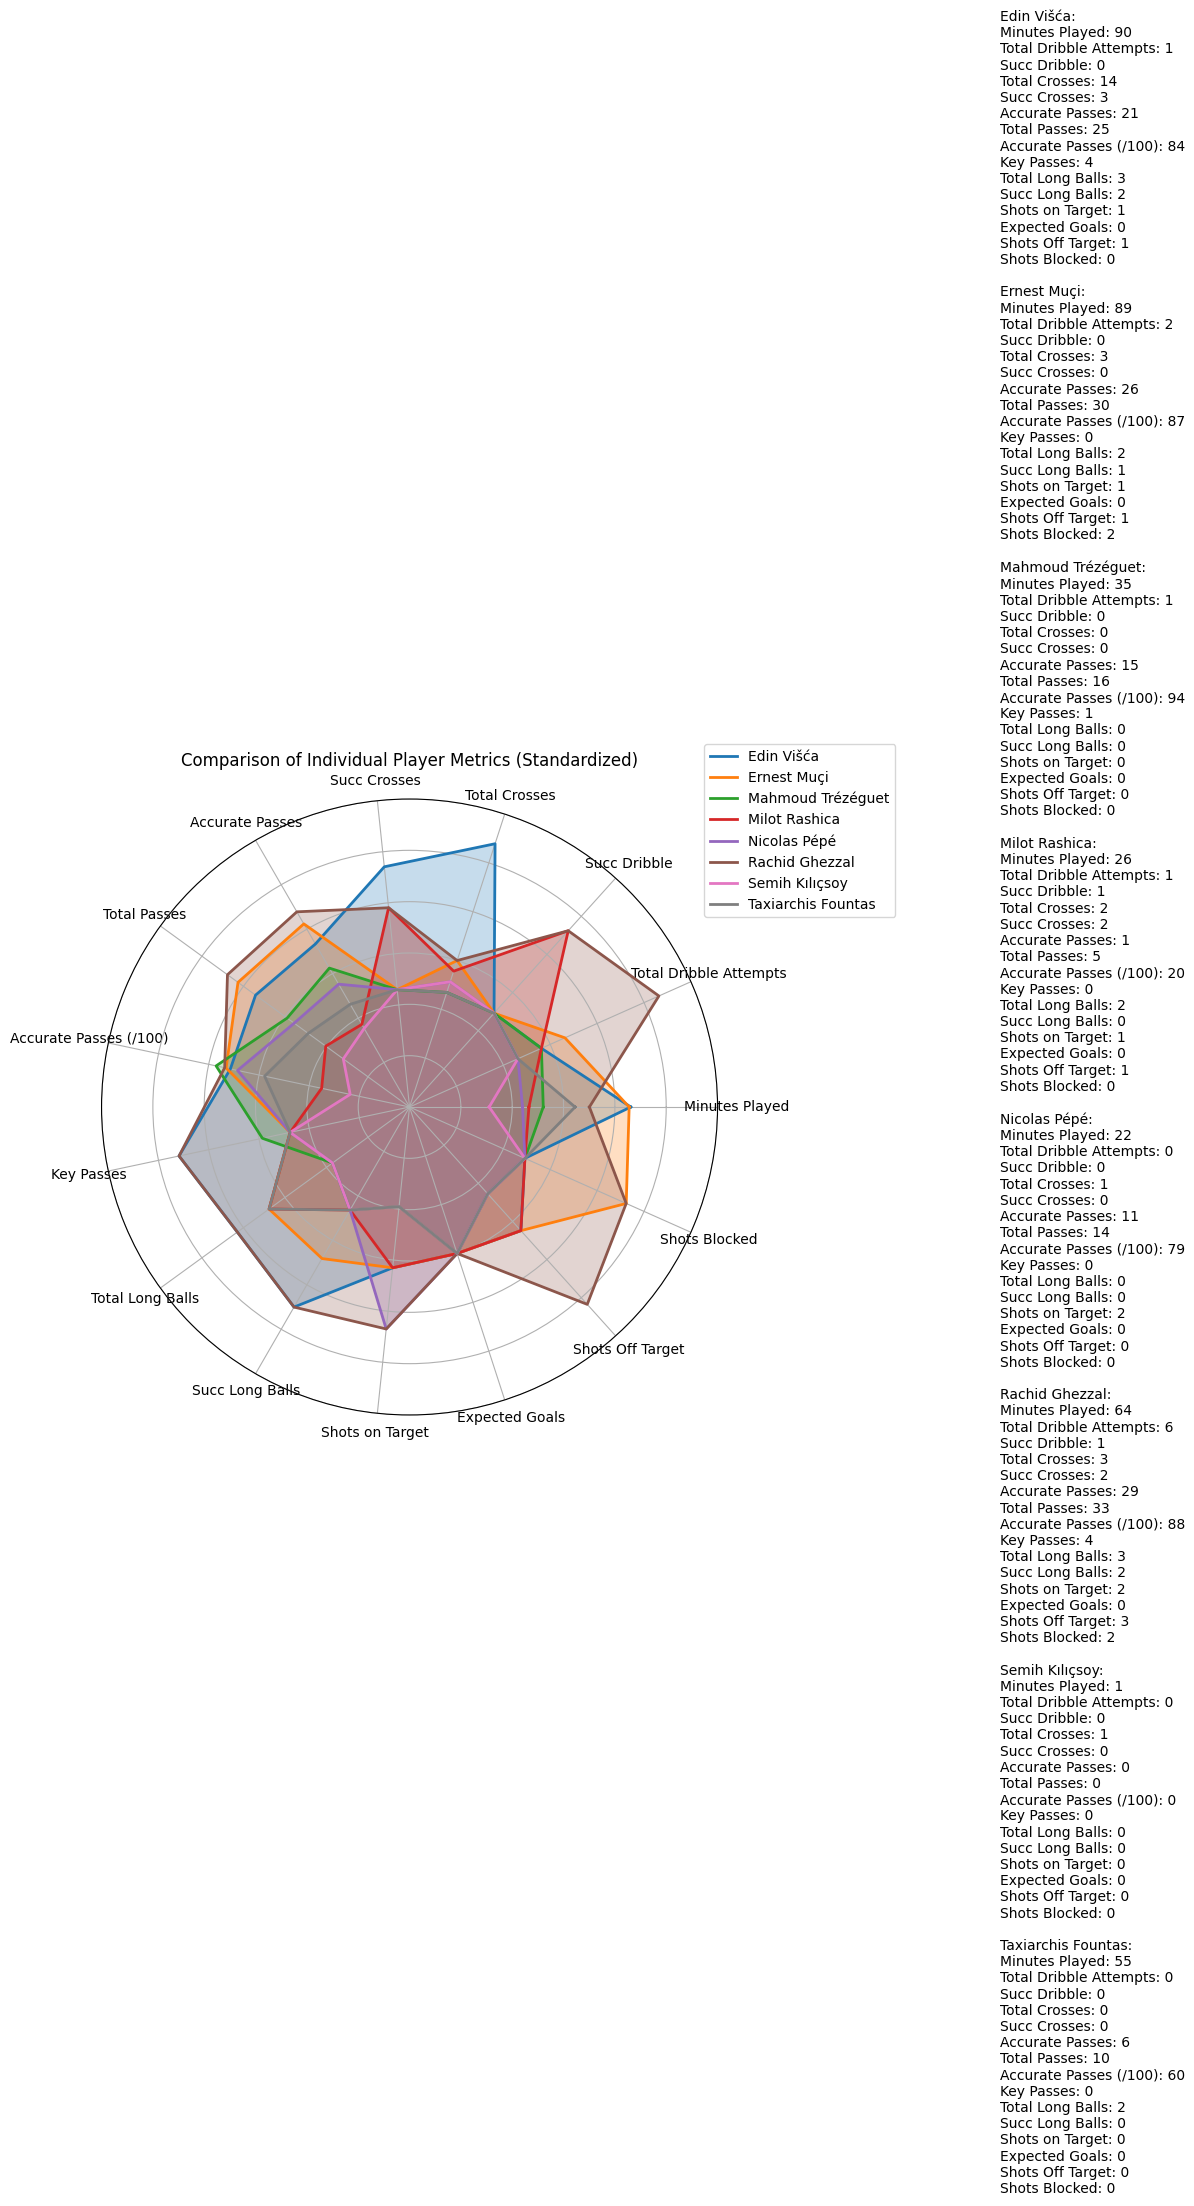

In [18]:
players = df[df['Name'].isin(['Edin Višća','Taxiarchis Fountas','Ernest Muçi', 'Rachid Ghezzal', 'Milot Rashica', 'Semih Kılıçsoy','Nicolas Pépé','Mahmoud Trézéguet'])]

if players.empty:
    print("İlgili oyuncular bulunamadı.")
else:
    # Radar grafiği için verileri hazırlama
    categories = ['Minutes Played','Total Dribble Attempts','Succ Dribble','Total Crosses','Succ Crosses','Accurate Passes', 'Total Passes', 'Accurate Passes (/100)', 'Key Passes', 
              'Total Long Balls', 'Succ Long Balls','Shots on Target','Expected Goals','Shots Off Target','Shots Blocked']
    num_vars = len(categories)

    # Standartize edilmiş DataFrame oluşturma
standardized_df = players.copy()
standardized_df[categories] = standardized_df[categories].apply(standardize)

# Radar grafiği için verileri hazırlama
num_vars = len(categories)

# Radar grafiği için açıları hesaplama
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Tam bir daire oluşturmak için

# Radar grafiği verilerini kapatmak için
def create_radar_data(row):
    values = row[categories].tolist()
    values += values[:1]
    return values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Her oyuncunun verilerini ekleme
for idx, player in standardized_df.iterrows():
    values = create_radar_data(player)
    ax.plot(angles, values, label=player['Name'], linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

# Grafik ayarları
ax.set_ylim(-3, 3)  # Standart sapmaya göre geniş bir aralık belirleme
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Legend için verileri hazırlama
legend_data = []
for i, row in players.iterrows():  # Orijinal df'den alınan değerler
    legend_data.append(f"{row['Name']}:\n" + "\n".join([f"{cat}: {row[cat]}" for cat in categories]))

# Legend'ı ekleme
plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

plt.title('Comparison of Individual Player Metrics (Standardized)')
plt.show()

İlk gözümüze çarpan değer Visca'nın orta deneme sayısı. Diğer tüm kanat oyuncularının toplamından daha fazla orta denemesinde bulunmuş. En çok başarılı orta sayısına sahip kanat oyuncusu da ayrıca Visca. Onu 2 başarılı orta ile Ghezzal ve Muci izliyor. 

En yüksek pas isabet oranına sahip kanat oyuncuları sırasıyla şöyle:
1. Trezeguet (%94)
2. Ghezzal (%88)
3. Muci (%87)
4. Visca (%84)

Ancak incelediğimizde en yüksek pas başarı oranına sahip kanat oyuncusu olan Trezeguet totalde sadece 16 pas denemesinde bulunmuş. Oyuna sonradan girdiği ve 16 pasın 15'inde başarılı olduğu için pas başarı oranının bu denli yüksek olması doğal karşılanabilir. 

Ama Ghezzal totalde 33, Muci 30 ve Visca 25 pas denemesinde bulunmuş. Beşiktaş kanatları, Trabzonspor kanatlarına göre daha isabetli pas atmışlar. 

Ayrıca Visca ve Ghezzal kilit pas konusunda diğer kanat oyuncularına göre gayet etkili olmuşlar. İkisi de 4'er kilit pas ile takımlarını en çok ileri bölgeye taşıyan kanat oyuncularından olmuşlar.




Şimdi kanatların total değerlerini inceleyelim.

> Minutes Played değerlerini tablodan çıkaracağız. Ve sadece 1 dakika görev almış olan Semih'i karşılaştırmaya dahil etmeyeceğiz

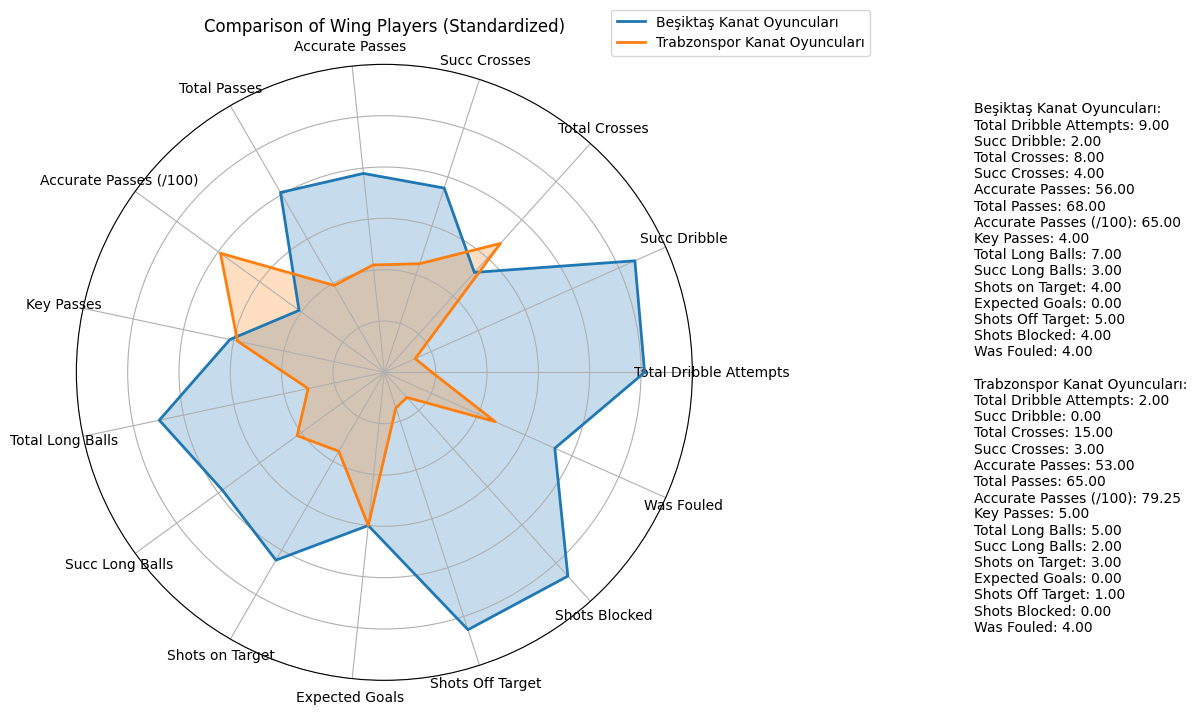

In [22]:
# İlgili oyuncuları seçme
players = df[df['Name'].isin(['Edin Višća', 'Taxiarchis Fountas', 'Ernest Muçi', 'Rachid Ghezzal', 'Milot Rashica', 'Nicolas Pépé', 'Mahmoud Trézéguet'])]

if players.empty:
    print("İlgili oyuncular bulunamadı.")
else:
    # Kategorileri belirleme
    categories = ['Total Dribble Attempts', 'Succ Dribble', 'Total Crosses', 'Succ Crosses', 'Accurate Passes', 
                  'Total Passes', 'Accurate Passes (/100)', 'Key Passes', 'Total Long Balls', 'Succ Long Balls', 
                  'Shots on Target', 'Expected Goals', 'Shots Off Target', 'Shots Blocked','Was Fouled']
    
    # Standartize etme fonksiyonu
    def standardize(series):
        if series.std() == 0:
            return series - series.mean()  # Eğer std 0 ise sadece ortalamayı çıkar
        return (series - series.mean()) / series.std()

    # Standartize edilmiş DataFrame oluşturma
    standardized_df = players.copy()
    standardized_df[categories] = standardized_df[categories].apply(standardize)

    # Grupları oluşturma (normal değerlerle)
    group1_normal = players[players['Name'].isin(['Rachid Ghezzal', 'Ernest Muçi', 'Milot Rashica'])].sum(numeric_only=True).astype(float)
    group2_normal = players[players['Name'].isin(['Edin Višća', 'Taxiarchis Fountas', 'Nicolas Pépé', 'Mahmoud Trézéguet'])].sum(numeric_only=True).astype(float)

    # Accurate Passes (/100) ortalamalarını ekleme
    group1_normal['Accurate Passes (/100)'] = players[players['Name'].isin(['Rachid Ghezzal', 'Ernest Muçi', 'Milot Rashica'])]['Accurate Passes (/100)'].mean()
    group2_normal['Accurate Passes (/100)'] = players[players['Name'].isin(['Edin Višća', 'Taxiarchis Fountas', 'Nicolas Pépé', 'Mahmoud Trézéguet'])]['Accurate Passes (/100)'].mean()

    # Grupları oluşturma (standartize edilmiş değerlerle)
    group1 = standardized_df[standardized_df['Name'].isin(['Rachid Ghezzal', 'Ernest Muçi', 'Milot Rashica'])].sum(numeric_only=True).astype(float)
    group2 = standardized_df[standardized_df['Name'].isin(['Edin Višća', 'Taxiarchis Fountas', 'Nicolas Pépé', 'Mahmoud Trézéguet'])].sum(numeric_only=True).astype(float)

    # Radar grafiği için verileri hazırlama
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Tam bir daire oluşturmak için

    def create_radar_data(row):
        values = row[categories].tolist()
        values += values[:1]
        return values

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Grupların verilerini ekleme
    values1 = create_radar_data(group1)
    ax.plot(angles, values1, label='Beşiktaş Kanat Oyuncuları', linewidth=2, linestyle='solid')
    ax.fill(angles, values1, alpha=0.25)

    values2 = create_radar_data(group2)
    ax.plot(angles, values2, label='Trabzonspor Kanat Oyuncuları', linewidth=2, linestyle='solid')
    ax.fill(angles, values2, alpha=0.25)

    # Grafik ayarları
    ax.set_ylim(-3, 3)  # Standart sapmaya göre geniş bir aralık belirleme
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    # Legend için verileri hazırlama (normal değerlerle)
    legend_data = []
    legend_data.append(f"Beşiktaş Kanat Oyuncuları:\n" + "\n".join([f"{cat}: {group1_normal[cat]:.2f}" for cat in categories]))
    legend_data.append(f"Trabzonspor Kanat Oyuncuları:\n" + "\n".join([f"{cat}: {group2_normal[cat]:.2f}" for cat in categories]))

    # Legend'ı ekleme
    plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

    plt.title('Comparison of Wing Players (Standardized)')
    plt.show()


Beşiktaş kanat oyuncularının pas başarı oranı Trabzonspor'a göre çok daha az. Ama total pas denemesi olarak Beşiktaş'ın kanat oyuncuları daha önde. 

Beşiktaş kanat oyuncuları dripling anlamında çok fazla denemede bulunurken, başarılı dripling oranı yaklaşık %22. Trabzonspor'da ise yalnızca 2 dripling denemesi olmuş ve başarı oranları %0.

Uzun top konusunda da Beşiktaş daha fazla denemede bulunurken hem daha fazla isabetli uzun top sayısına sahipler hem de oran olarak az bir farkla daha başarılı gözüküyor.

Beşiktaş kanat oyuncuları totalde 13 şut denemesinde bulunurken Trabzonspor kanat oyuncuları totalde 4 şut denemesinde bulunmuş. Beşiktaş kanat oyuncuları totalde 1 gol atarken Trabzon kanat oyuncuları da totalde 1 gol atarak skora katkıda bulunmuş. 

Orta deneme sayısında ciddi bir üstünlük kuran Trabzonspor kanat oyuncularını dikkate aldığımızda Trabzonspor daha çok orta-gol sistemi üstünden gittiğini istatistiksel olarak da söyleyebiliriz. Beşiktaş'ın ise az önce incelediğimiz orta saha triosu ile oyunu merkezden oynayarak kanat oyuncularını besleyerek kanat oyuncularını şut pozisyonuna sokarak oyunda oldunu söyleyebiliriz.

Faule maruz kalma konusunda da Trabzonspor da Beşiktaş da eşit değerlere sahip.

Şimdi de kanat oyuncularının defans anlamında değerlerini inceleyelim.

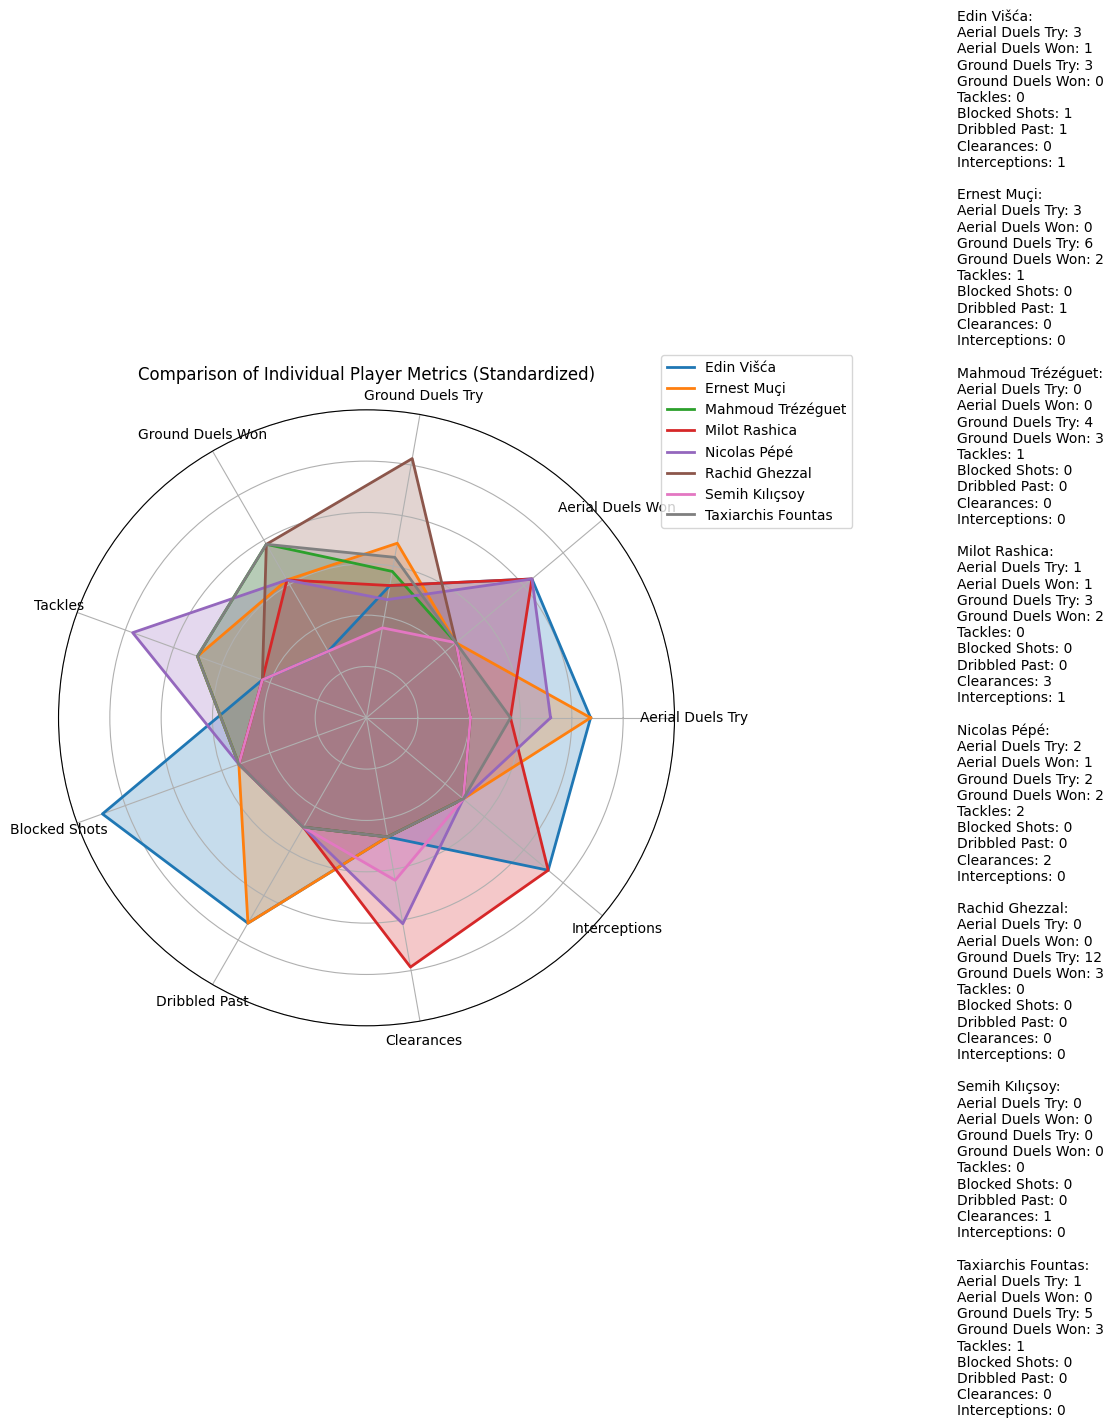

In [23]:
players = df[df['Name'].isin(['Edin Višća','Taxiarchis Fountas','Ernest Muçi', 'Rachid Ghezzal', 'Milot Rashica', 'Semih Kılıçsoy','Nicolas Pépé','Mahmoud Trézéguet'])]

if players.empty:
    print("İlgili oyuncular bulunamadı.")
else:
    # Radar grafiği için verileri hazırlama
    categories = ['Aerial Duels Try', 'Aerial Duels Won', 'Ground Duels Try', 'Ground Duels Won', 
                  'Tackles', 'Blocked Shots', 'Dribbled Past', 'Clearances', 'Interceptions']
    num_vars = len(categories)

    # Standartize edilmiş DataFrame oluşturma
standardized_df = players.copy()
standardized_df[categories] = standardized_df[categories].apply(standardize)

# Radar grafiği için verileri hazırlama
num_vars = len(categories)

# Radar grafiği için açıları hesaplama
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Tam bir daire oluşturmak için

# Radar grafiği verilerini kapatmak için
def create_radar_data(row):
    values = row[categories].tolist()
    values += values[:1]
    return values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Her oyuncunun verilerini ekleme
for idx, player in standardized_df.iterrows():
    values = create_radar_data(player)
    ax.plot(angles, values, label=player['Name'], linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

# Grafik ayarları
ax.set_ylim(-3, 3)  # Standart sapmaya göre geniş bir aralık belirleme
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Legend için verileri hazırlama
legend_data = []
for i, row in players.iterrows():  # Orijinal df'den alınan değerler
    legend_data.append(f"{row['Name']}:\n" + "\n".join([f"{cat}: {row[cat]}" for cat in categories]))

# Legend'ı ekleme
plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

plt.title('Comparison of Individual Player Metrics (Standardized)')
plt.show()

İncelediğimizde göze çarpan tek değer Rachid Ghezzal'ın 12 kere hava topu mücadelesine girmiş olması. Bunu dikkate alarak takımın kanatlarının total değerlerini inceleyelim.

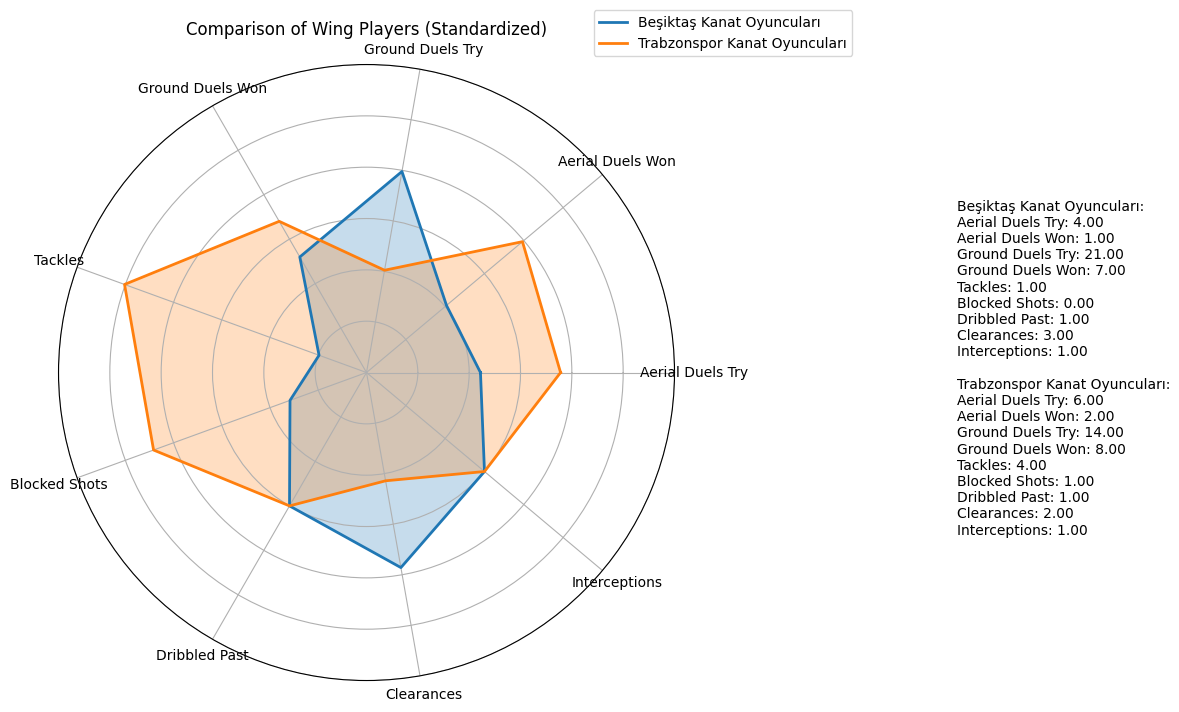

In [24]:
# İlgili oyuncuları seçme
players = df[df['Name'].isin(['Edin Višća', 'Taxiarchis Fountas', 'Ernest Muçi', 'Rachid Ghezzal', 'Milot Rashica', 'Nicolas Pépé', 'Mahmoud Trézéguet','Semih Kılıçsoy'])]

if players.empty:
    print("İlgili oyuncular bulunamadı.")
else:
    # Kategorileri belirleme
    categories = ['Aerial Duels Try', 'Aerial Duels Won', 'Ground Duels Try', 'Ground Duels Won', 
                  'Tackles', 'Blocked Shots', 'Dribbled Past', 'Clearances', 'Interceptions']
    
    # Standartize etme fonksiyonu
    def standardize(series):
        if series.std() == 0:
            return series - series.mean()  # Eğer std 0 ise sadece ortalamayı çıkar
        return (series - series.mean()) / series.std()

    # Standartize edilmiş DataFrame oluşturma
    standardized_df = players.copy()
    standardized_df[categories] = standardized_df[categories].apply(standardize)

    # Grupları oluşturma (normal değerlerle)
    group1_normal = players[players['Name'].isin(['Rachid Ghezzal', 'Ernest Muçi', 'Milot Rashica'])].sum(numeric_only=True).astype(float)
    group2_normal = players[players['Name'].isin(['Edin Višća', 'Taxiarchis Fountas', 'Nicolas Pépé', 'Mahmoud Trézéguet'])].sum(numeric_only=True).astype(float)

    # Grupları oluşturma (standartize edilmiş değerlerle)
    group1 = standardized_df[standardized_df['Name'].isin(['Rachid Ghezzal', 'Ernest Muçi', 'Milot Rashica','Semih Kılıçsoy'])].sum(numeric_only=True).astype(float)
    group2 = standardized_df[standardized_df['Name'].isin(['Edin Višća', 'Taxiarchis Fountas', 'Nicolas Pépé', 'Mahmoud Trézéguet'])].sum(numeric_only=True).astype(float)

    # Radar grafiği için verileri hazırlama
    num_vars = len(categories)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Tam bir daire oluşturmak için

    def create_radar_data(row):
        values = row[categories].tolist()
        values += values[:1]
        return values

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Grupların verilerini ekleme
    values1 = create_radar_data(group1)
    ax.plot(angles, values1, label='Beşiktaş Kanat Oyuncuları', linewidth=2, linestyle='solid')
    ax.fill(angles, values1, alpha=0.25)

    values2 = create_radar_data(group2)
    ax.plot(angles, values2, label='Trabzonspor Kanat Oyuncuları', linewidth=2, linestyle='solid')
    ax.fill(angles, values2, alpha=0.25)

    # Grafik ayarları
    ax.set_ylim(-3, 3)  # Standart sapmaya göre geniş bir aralık belirleme
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    # Legend için verileri hazırlama (normal değerlerle)
    legend_data = []
    legend_data.append(f"Beşiktaş Kanat Oyuncuları:\n" + "\n".join([f"{cat}: {group1_normal[cat]:.2f}" for cat in categories]))
    legend_data.append(f"Trabzonspor Kanat Oyuncuları:\n" + "\n".join([f"{cat}: {group2_normal[cat]:.2f}" for cat in categories]))

    # Legend'ı ekleme
    plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

    plt.title('Comparison of Wing Players (Standardized)')
    plt.show()


Trabzonspor kanat oyuncuları daha fazla topa müdahale ederken Beşiktaş kanat oyuncuları daha az bir değere sahip.

Mücadele kazanma konusunda da Trabzonspor kanat oyuncuları daha başarılı bir orana sahip. 

Trabzon kanatları ofans anlamında Beşiktaş kanatları kadar aktif olamasa da defans anlamında işler tam tersi gibi gözüküyor.

Beşiktaş daha ileride bir görüntü çizerken; Trabzonspor'un Onuachu hariç çoğu oyuncusu topun arkasına geçerek geriye yaslanan bir görüntü çiziyordu. Trabzonspor en geriden en ileri noktaya uzun topla veya ortalarla doğrudan oyunu Beşiktaş sahasına yıkmak istediği için kanat oyuncuları daha defansif anlamda iş çıkarmış.

Beşiktaş ise oyunu ileri yıkmaya çalışan, merkezden kanatları besleyen veya kanatların merkeze devrilmesiyle gole gitmeye çalışan bir oyun sergilediğinden Beşiktaş kanatları Trabzonspor kanatları gibi defansif değil; daha ofansif anlamda bir görüntü sergilemiş.

# Hücum oyuncuları

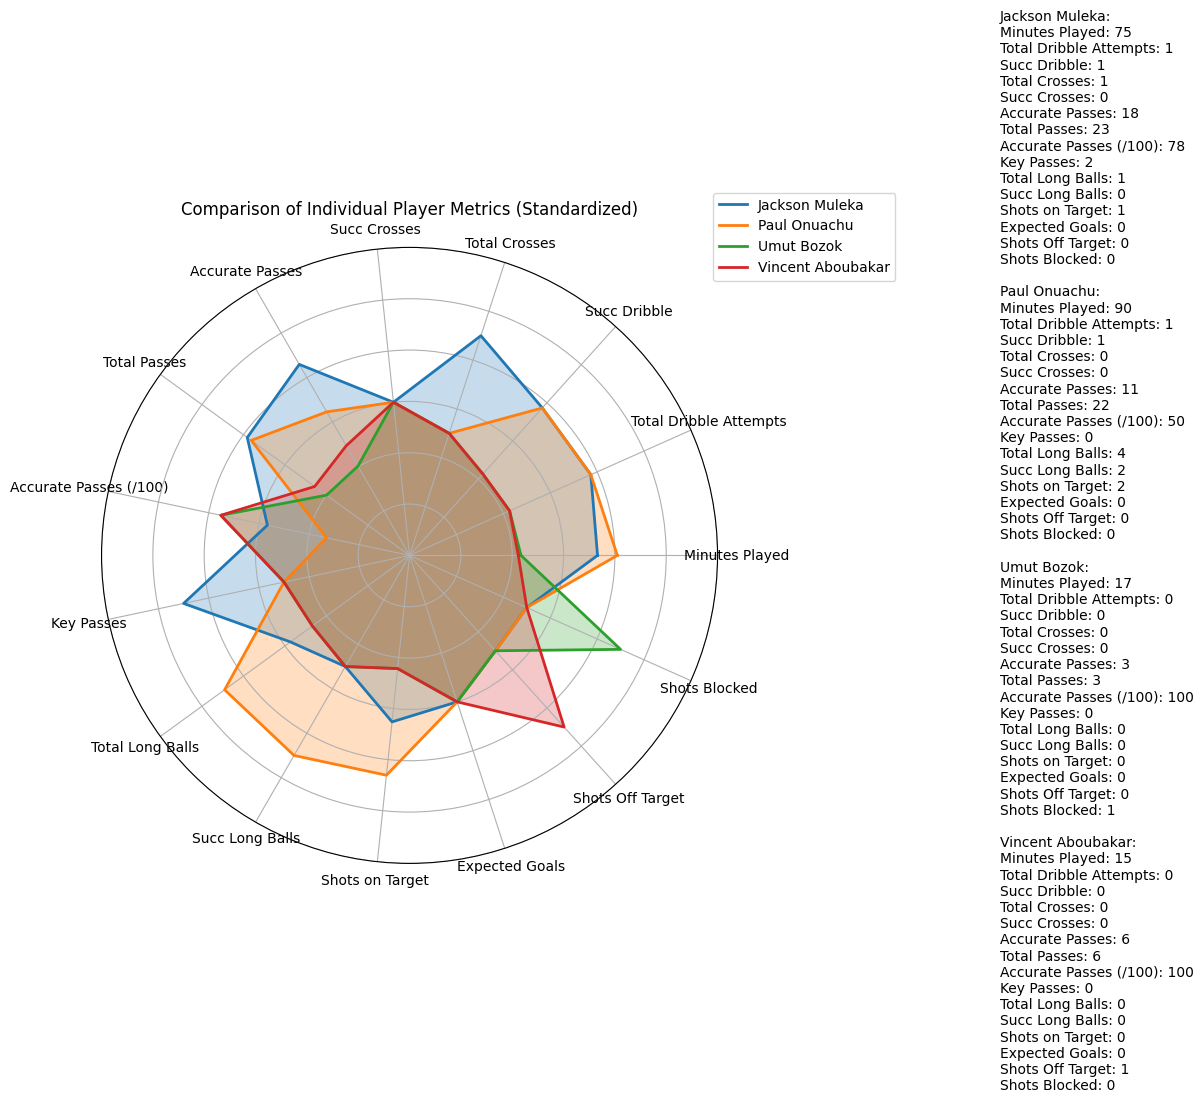

In [25]:
players = df[df['Name'].isin(['Jackson Muleka','Paul Onuachu','Vincent Aboubakar','Umut Bozok'])]

if players.empty:
    print("İlgili oyuncular bulunamadı.")
else:
    # Radar grafiği için verileri hazırlama
    categories = ['Minutes Played','Total Dribble Attempts','Succ Dribble','Total Crosses','Succ Crosses','Accurate Passes', 'Total Passes', 'Accurate Passes (/100)', 'Key Passes', 
              'Total Long Balls', 'Succ Long Balls','Shots on Target','Expected Goals','Shots Off Target','Shots Blocked']
    num_vars = len(categories)

    # Standartize edilmiş DataFrame oluşturma
standardized_df = players.copy()
standardized_df[categories] = standardized_df[categories].apply(standardize)

# Radar grafiği için verileri hazırlama
num_vars = len(categories)

# Radar grafiği için açıları hesaplama
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Tam bir daire oluşturmak için

# Radar grafiği verilerini kapatmak için
def create_radar_data(row):
    values = row[categories].tolist()
    values += values[:1]
    return values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Her oyuncunun verilerini ekleme
for idx, player in standardized_df.iterrows():
    values = create_radar_data(player)
    ax.plot(angles, values, label=player['Name'], linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

# Grafik ayarları
ax.set_ylim(-3, 3)  # Standart sapmaya göre geniş bir aralık belirleme
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Legend için verileri hazırlama
legend_data = []
for i, row in players.iterrows():  # Orijinal df'den alınan değerler
    legend_data.append(f"{row['Name']}:\n" + "\n".join([f"{cat}: {row[cat]}" for cat in categories]))

# Legend'ı ekleme
plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

plt.title('Comparison of Individual Player Metrics (Standardized)')
plt.show()

Oyunda en çok yer alan forvetler Muleka ve Onuachu'yu karşılaştıralım

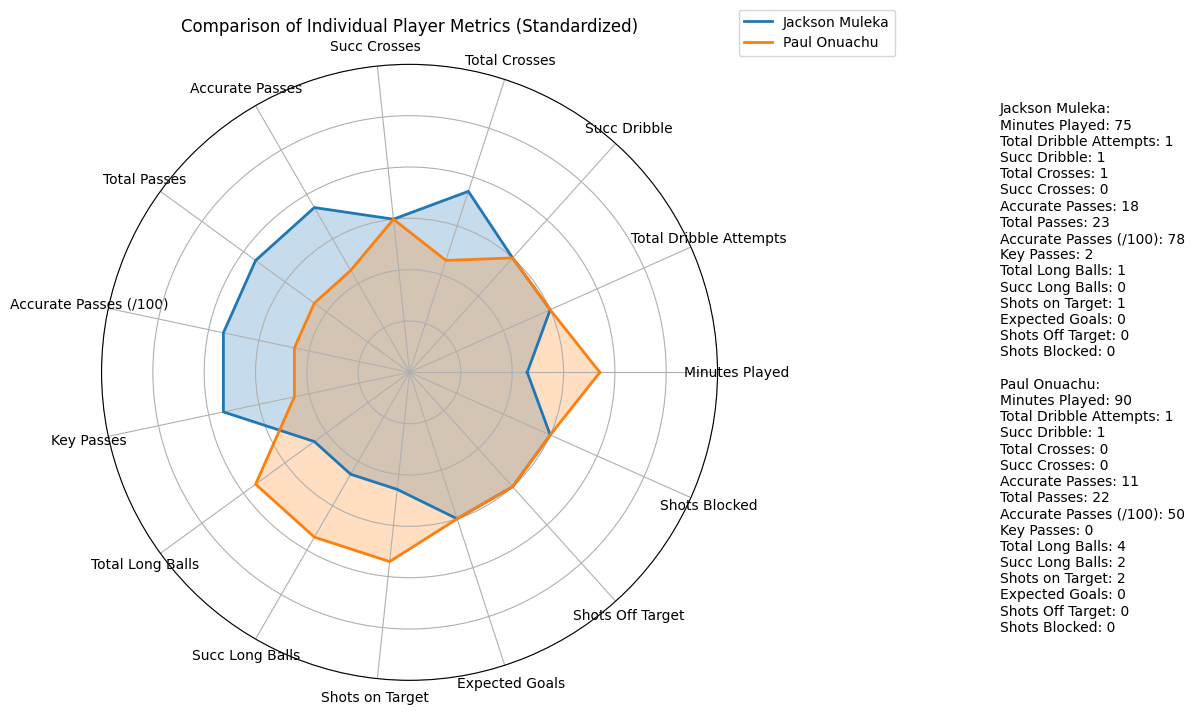

In [26]:
players = df[df['Name'].isin(['Jackson Muleka','Paul Onuachu'])]

if players.empty:
    print("İlgili oyuncular bulunamadı.")
else:
    # Radar grafiği için verileri hazırlama
    categories = ['Minutes Played','Total Dribble Attempts','Succ Dribble','Total Crosses','Succ Crosses','Accurate Passes', 'Total Passes', 'Accurate Passes (/100)', 'Key Passes', 
              'Total Long Balls', 'Succ Long Balls','Shots on Target','Expected Goals','Shots Off Target','Shots Blocked']
    num_vars = len(categories)

    # Standartize edilmiş DataFrame oluşturma
standardized_df = players.copy()
standardized_df[categories] = standardized_df[categories].apply(standardize)

# Radar grafiği için verileri hazırlama
num_vars = len(categories)

# Radar grafiği için açıları hesaplama
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Tam bir daire oluşturmak için

# Radar grafiği verilerini kapatmak için
def create_radar_data(row):
    values = row[categories].tolist()
    values += values[:1]
    return values

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Her oyuncunun verilerini ekleme
for idx, player in standardized_df.iterrows():
    values = create_radar_data(player)
    ax.plot(angles, values, label=player['Name'], linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

# Grafik ayarları
ax.set_ylim(-3, 3)  # Standart sapmaya göre geniş bir aralık belirleme
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Legend için verileri hazırlama
legend_data = []
for i, row in players.iterrows():  # Orijinal df'den alınan değerler
    legend_data.append(f"{row['Name']}:\n" + "\n".join([f"{cat}: {row[cat]}" for cat in categories]))

# Legend'ı ekleme
plt.gcf().text(1.25, 0.5, "\n\n".join(legend_data), fontsize=10, va='center', ha='left')

plt.title('Comparison of Individual Player Metrics (Standardized)')
plt.show()

Onuachu şut anlamında daha önde bir görüntü sergilerken Muleka ise daha çok pas ve oyun kurulumu ağırlıklı bir görüntü sergilemiş. Pas başarı oranı olarak Muleka çok önde gözükürken şut sayısı anlamında Onuachu daha önde. İki oyuncunun da isabetsiz şutu bulunmuyor.

# Özet

Beşiktaş oyunu domine eden, önde oynayan ve kanatları oyuna şut anlamında dahil eden bir görüntü çizerken Trabzonspor'un ise ağırlıklı olarak geriye yaslanan, uzun toplarla veya duran toplarla gol aradığı bir görüntü izledik. Ve istatistiksel olarak da bunlar gözümüze çarpıyor. Beşiktaş Omar Colley ve Necip Uysal ile Onuachu'nun hava toplarındaki üstünlüğünü azaltmış ve önde pres yaparak Trabzonspor'un ayağı iyi oyuncularının uzun top denemelerini engellemiştir. 

Al Musrati'nin orta sahayı domine eden performansı Trabzonspor'un merkezden oyun kurarak kısa pasla çıkmasını engellemiş oldu. Bu sayede Trabzonspor mecbur olarak kanattan oynamak durumunda kaldığı için tek gol şansları Onuachu ve duran toplar olmuştu. Onuachu'nun hava tehdidine karşı Necip-Colley ikilisinden iyi verim alan Beşiktaş Trabzonspor'un bir opsiyonunu azaltmış oldu. Zaten ikinci opsiyon olan duran top ile de Trabzonspor gol bulmuştur.

Trabzonspor'un ilk golünde ise Beşiktaş'ın öne yaslanması sonucu arka alanda oluşan boşluktan yararlanan Trabzonspor golü bulmuştur.

Beşiktaş ise tüm gollerini merkezden gelen ataklar sonucu bulmuştur. Kazanılan penaltının merkezde meydana gelmesi, Salih Uçan'ın merkezden bindirme yaparak defans arkasına sarkması ve Al Musrati'nin merkezden uzak şut ile kale önüne otobüs çekmiş olan Trabzonspor'u mağlup eden golü atması ; Beşiktaş'ın merkezden kurduğu oyun sonucu olmuştur. Ayrıca Abdullah Avcı'nın ikinci yarıda yaptığı orta saha oyuncusu olan Umut Güneş ve Berat Özdemir yerine kanat ve forvet oyuncuları sokması sonucu, Trabzonspor merkezi hafiflemiş ve Beşiktaş'ın merkezden oyun kurulumunu ve orta saha dominasyonunu arttırmıştır.

